# **Durant Career Impact Analysis**

This notebook analyzes how Kevin Durant's move from the Oklahoma City Thunder (OKC) to the Golden State Warriors (GSW) affected:

1. **His personal play style and scoring efficiency**  
2. **The offensive roles of key teammates** — including Russell Westbrook, Stephen Curry, Klay Thompson, and Draymond Green  
3. **Team-level shot selection and distribution patterns** during and after his tenure

The analysis draws from shot-level and play-by-play data filtered by era:
- **OKC Era**: 2013–2016  
- **GSW Era**: 2016–2019  
- **Post-Durant** comparisons where relevant  

Key metrics include:
- Field Goal %, 3PT %, True Shooting %, and Assisted Shot %  
- Shot distance and zone distribution  
- Shot volume and playmaking metrics  
- Clutch performance and playoff outcomes  

All visualizations follow a consistent team-based color scheme:
- **OKC**: Blue (`#007AC1`)  
- **GSW**: Yellow (`#FFC72C`)  
- **Westbrook Post-Durant**: Red (`#EF3B24`)  

---

## **1. GSW Playmaking & Shot Selection During the Durant Era**

This section explores Golden State’s offensive behavior during Durant’s tenure:

- **Top Assist Leaders**: Highlights Draymond Green and Stephen Curry as primary facilitators  
- **Clutch Shot Takers**: Identifies high-leverage shooters like Durant and Curry  
- **Durant On/Off Shot Distribution**: Reveals increased shot activity when Durant was on the floor  

---

## **2. Shot Profile Analysis: Kevin Durant Across Eras**

Breaks down Durant’s shot tendencies and scoring zones in OKC vs. GSW:

- **Zone Efficiency and Distribution**: GSW era featured more 3PT attempts and higher efficiency  
- **Curry’s Influence**: Playing with Curry led to longer shot distances and higher off-ball efficiency  
- **Distance Overlay**: GSW tenure showed broader perimeter usage compared to OKC’s mid-range-heavy profile  

---

## **3. Playoff Performance Comparison: Impact of Kevin Durant on the Warriors**

Quantifies Golden State’s playoff improvement post-Durant acquisition:

- **Win %** increased by **11.4 percentage points**  
- **FG %** and **Clutch FG %** saw measurable gains  
- **Offensive Rating** omitted due to missing possession data — flagged for refinement  

---

## **4. Durant’s Role and Efficiency: OKC vs. GSW**

Highlights Durant’s offensive transformation:

- **Assisted Shot %** increased, reflecting more off-ball action in GSW  
- **FG% and 3PT%** rose across the board  
- Comparison with **Westbrook, Curry, and Klay** shows Durant’s hybrid creator-finisher role  

---

## **5. Core Warriors Adjustments During the Durant Era**

Analyzes how Curry, Klay, and Draymond adapted:

- **Shot Volume**: Largely stable, reflecting balanced usage  
- **3PT Rates**: More selective attempts for Thompson and Green  
- **Assisted Shot %**: Increased for Curry, showing his off-ball evolution  

---

## **6. Kevin Durant: Play Style Evolution from OKC to GSW**

Summarizes Durant’s scoring adjustments:

- **Efficiency Gains**: Especially in mid-range and 3PT zones  
- **Zone-Based Creation**: GSW featured more assisted long-range shots  
- **Shot Volume**: Slight decrease, but more efficient attempts  

---

## **7. Durant Era Impact: Style and Team Adjustments**

Brings together team-level and teammate-level comparisons:

- **Durant Bar Chart**: FG%, 3PT%, 3PT Attempt Rate, and Assisted % (OKC vs. GSW)  
- **Teammate Reaction Plots**: Westbrook increased self-creation post-Durant, Curry adjusted role during Durant’s GSW era  
- **Shot Distribution Heatmaps**: Show shifts in OKC and GSW team shooting zones with Durant on/off  


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [24]:
# Load pre-saved cleaned dataframes by era and team
okc_pre_durant_leave = pd.read_csv("/content/drive/MyDrive/DSO-574 NBA Basketball Assignment/Cleaned Data/okc_pre_results.csv")
okc_durant_gsw_era = pd.read_csv("/content/drive/MyDrive/DSO-574 NBA Basketball Assignment/Cleaned Data/okc_during_results.csv")
okc_post_durant = pd.read_csv("/content/drive/MyDrive/DSO-574 NBA Basketball Assignment/Cleaned Data/okc_post_results.csv")

gsw_pre_durant = pd.read_csv("/content/drive/MyDrive/DSO-574 NBA Basketball Assignment/Cleaned Data/gsw_pre_results.csv")
gsw_durant_era = pd.read_csv("/content/drive/MyDrive/DSO-574 NBA Basketball Assignment/Cleaned Data/gsw_during_results.csv")
gsw_post_durant = pd.read_csv("/content/drive/MyDrive/DSO-574 NBA Basketball Assignment/Cleaned Data/gsw_post_results.csv")

analyze_durant_impact = pd.read_csv("/content/drive/MyDrive/DSO-574 NBA Basketball Assignment/Cleaned Data/durant_analysis_results.csv")

# Store in a dictionary to maintain compatibility with the rest of the notebook
results = {
    'okc_pre': okc_pre_durant_leave,
    'okc_during': okc_durant_gsw_era,
    'okc_post': okc_post_durant,
    'gsw_pre': gsw_pre_durant,
    'gsw_during': gsw_durant_era,
    'gsw_post': gsw_post_durant
}


In [11]:
# =====================================================
# STEP 1: SETUP AND IMPORTS
# Required libraries for analysis and visualization
# =====================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick  # For percentage formatting

# Set plot style for better visuals
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# **Durant Era Impact: Style and Team Adjustments**

This section examines the impact of Kevin Durant’s transition from the Oklahoma City Thunder (OKC) to the Golden State Warriors (GSW), focusing on:

1. Changes in Durant's individual play style  
2. Adjustments made by star teammates Russell Westbrook and Stephen Curry  
3. Shifts in team-level shot distribution patterns for OKC and GSW

**1. Kevin Durant's Play Style Changes**
A side-by-side bar chart compares Durant’s performance in four key metrics during his time with OKC and GSW:
- Field Goal Percentage (FG%)  
- Three-Point Percentage (3PT%)  
- Three-Point Attempt Rate  
- Assisted Shot Percentage  

Durant’s GSW era reflects a more perimeter-oriented and assisted offensive role. The visualization uses consistent team color coding, with OKC represented in blue and GSW in yellow.

**2. Teammate Adaptation: Westbrook and Curry**
Two side-by-side bar plots illustrate how Durant’s presence influenced his co-stars:
- Westbrook increased his shooting volume and self-creation after Durant’s departure (blue vs. red)
- Curry showed modest decreases in shot attempts and a shift in role once Durant joined (blue vs. yellow)

All values are normalized for comparability, with annotations indicating actual shot volumes.

**3. Shot Distribution Shifts: OKC and GSW**  
The final visual shows how team shot selection evolved before and after Durant:
- OKC leaned more heavily on mid-range shots after Durant left
- GSW showed a similar trend with Durant’s arrival, moving slightly away from their rim-and-threes model

Each subplot presents the proportion of shots by zone: At Rim, Paint, Mid-Range, and 3PT, with matching y-axis scales and annotated values for clarity.


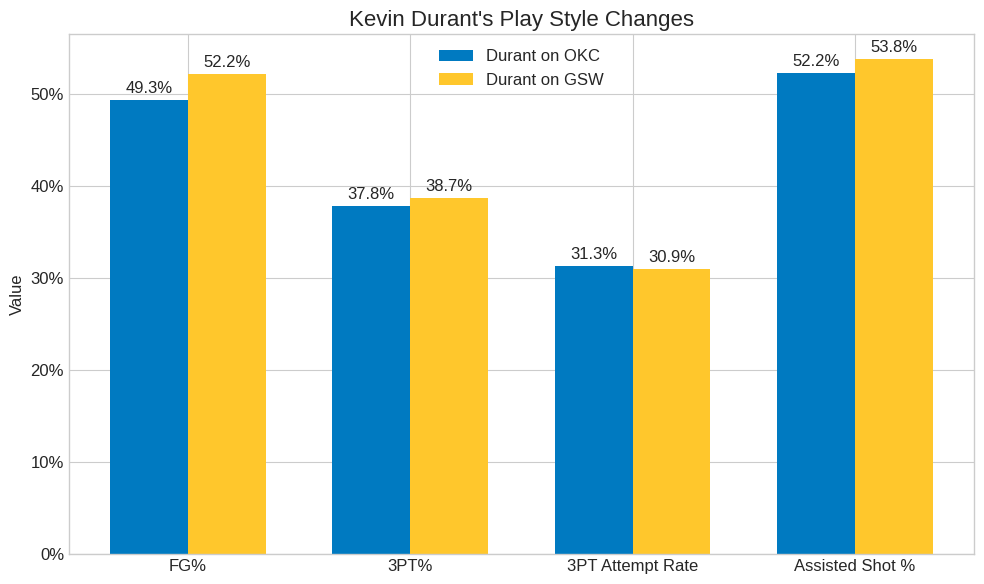

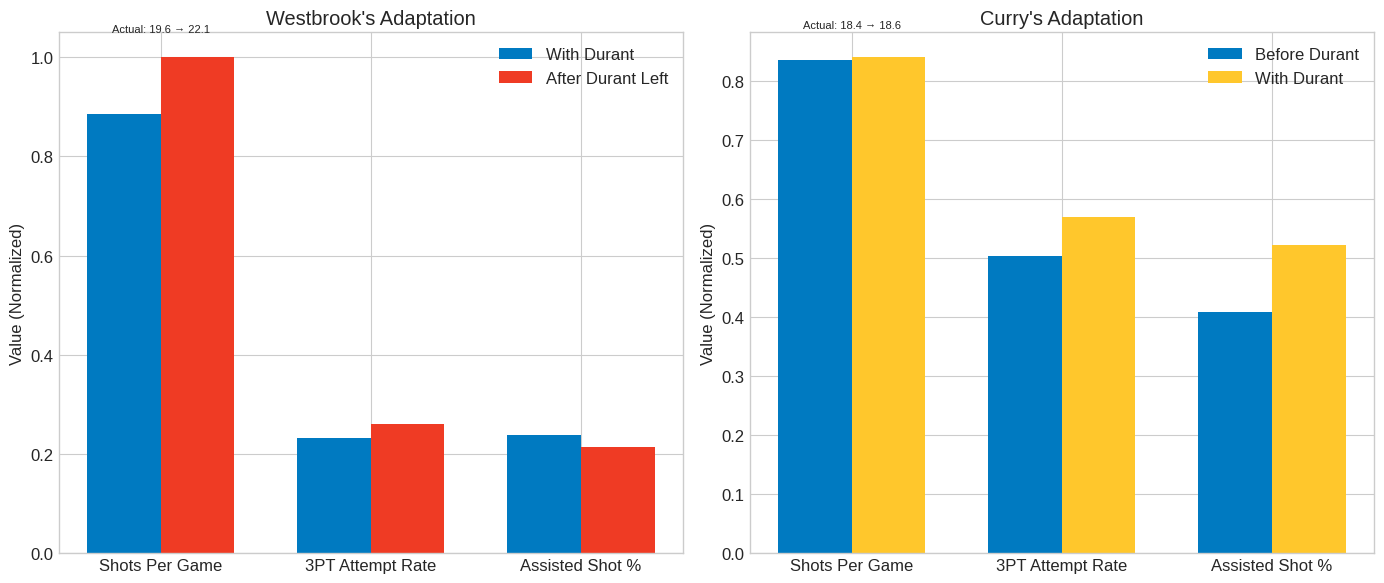

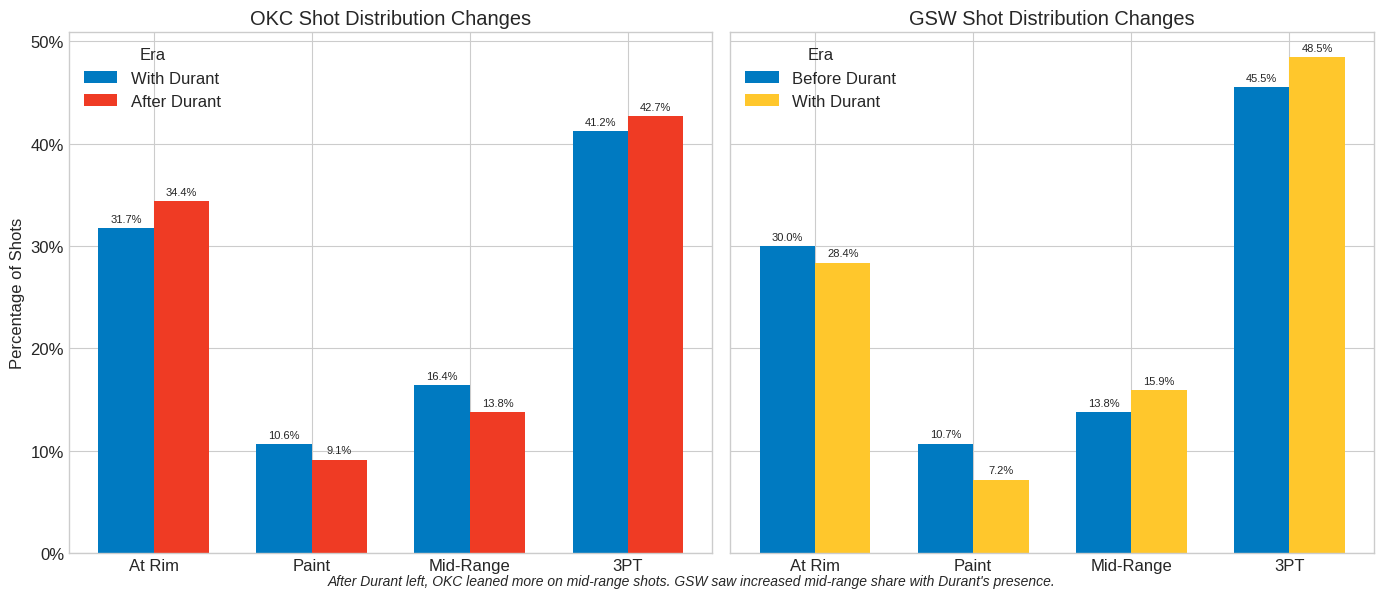

In [21]:
# Consistent color palette
OKC_BLUE = '#007AC1'
GSW_YELLOW = '#FFC72C'
WESTBROOK_RED = '#EF3B24'

# Assign Curry Before Durant same as OKC blue (GSW wasn’t his team yet)
CURRY_BLUE = OKC_BLUE


# Plot 1: Durant's Play Style Changes
fig1, ax1 = plt.subplots(figsize=(10, 6))
metrics = ['fg_pct', 'three_pt_pct', 'three_pt_rate', 'assisted_pct']
labels = ['FG%', '3PT%', '3PT Attempt Rate', 'Assisted Shot %']
okc_values = [okc_metrics.get(m, 0) for m in metrics]
gsw_values = [gsw_metrics.get(m, 0) for m in metrics]
x = np.arange(len(metrics))
width = 0.35

okc_bars = ax1.bar(x - width/2, okc_values, width, label='Durant on OKC', color=OKC_BLUE)
gsw_bars = ax1.bar(x + width/2, gsw_values, width, label='Durant on GSW', color=GSW_YELLOW)
ax1.set_title("Kevin Durant's Play Style Changes", fontsize=16)
ax1.set_ylabel('Value')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for bars in [okc_bars, gsw_bars]:
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:.1%}', xy=(bar.get_x() + bar.get_width()/2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.savefig('durant_play_changes.png', dpi=300, bbox_inches='tight')


# Plot 2: Star Teammates Adaptation
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
metrics = ['shots_per_game', 'three_pt_rate', 'assisted_pct']
labels = ['Shots Per Game', '3PT Attempt Rate', 'Assisted Shot %']
x = np.arange(len(metrics))
width = 0.35
max_shots = max(wb_with_values[0], wb_after_values[0], curry_before_values[0], curry_with_values[0])
wb_with_values[0] /= max_shots
wb_after_values[0] /= max_shots
curry_before_values[0] /= max_shots
curry_with_values[0] /= max_shots

ax1.bar(x - width/2, wb_with_values, width, label='With Durant', color=OKC_BLUE)
ax1.bar(x + width/2, wb_after_values, width, label='After Durant Left', color=WESTBROOK_RED)
ax1.set_title("Westbrook's Adaptation")
ax1.set_ylabel('Value (Normalized)')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()
ax1.text(x[0], max(wb_with_values[0], wb_after_values[0]) + 0.05,
         f"Actual: {wb_with_metrics['shots_per_game']:.1f} → {wb_after_metrics['shots_per_game']:.1f}",
         ha='center', fontsize=8)

ax2.bar(x - width/2, curry_before_values, width, label='Before Durant', color=CURRY_BLUE)
ax2.bar(x + width/2, curry_with_values, width, label='With Durant', color=GSW_YELLOW)
ax2.set_title("Curry's Adaptation")
ax2.set_ylabel('Value (Normalized)')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend()
ax2.text(x[0], max(curry_before_values[0], curry_with_values[0]) + 0.05,
         f"Actual: {curry_before_metrics['shots_per_game']:.1f} → {curry_with_metrics['shots_per_game']:.1f}",
         ha='center', fontsize=8)

plt.tight_layout()
plt.savefig('teammate_adaptation.png', dpi=300, bbox_inches='tight')


# Plot 3: Team Shot Distribution
# Refined color palette
OKC_BLUE = '#007AC1'
OKC_DARK_BLUE = '#005A8C'  # Darker OKC tone for contrast
GSW_YELLOW = '#FFC72C'
OKC_AFTER_DURANT = WESTBROOK_RED

# Zones to display
zones = ['At Rim', 'Paint', 'Mid-Range', '3PT']
x = np.arange(len(zones))
width = 0.35

# Values
okc_with_vals = [okc_with_dist.get(z, 0) for z in zones]
okc_after_vals = [okc_after_dist.get(z, 0) for z in zones]
gsw_before_vals = [gsw_before_dist.get(z, 0) for z in zones]
gsw_with_vals = [gsw_with_dist.get(z, 0) for z in zones]

# Plot
fig3, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# OKC shot distribution
okc_bars1 = ax1.bar(x - width/2, okc_with_vals, width, label='With Durant', color=OKC_BLUE)
okc_bars2 = ax1.bar(x + width/2, okc_after_vals, width, label='After Durant', color=OKC_AFTER_DURANT)

ax1.set_title("OKC Shot Distribution Changes")
ax1.set_xticks(x)
ax1.set_xticklabels(zones)
ax1.set_ylabel("Percentage of Shots")
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax1.legend(title="Era")

# GSW shot distribution
gsw_bars1 = ax2.bar(x - width/2, gsw_before_vals, width, label='Before Durant', color=OKC_BLUE)
gsw_bars2 = ax2.bar(x + width/2, gsw_with_vals, width, label='With Durant', color=GSW_YELLOW)
ax2.set_title("GSW Shot Distribution Changes")
ax2.set_xticks(x)
ax2.set_xticklabels(zones)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.legend(title="Era")

# Annotations
for bars in [okc_bars1, okc_bars2, gsw_bars1, gsw_bars2]:
    for bar in bars:
        height = bar.get_height()
        ax = bar.axes
        ax.annotate(f'{height:.1%}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

# Caption
plt.figtext(0.5, 0.01,
    "After Durant left, OKC leaned more on mid-range shots. GSW saw increased mid-range share with Durant's presence.",
    ha='center', fontsize=10, style='italic'
)

plt.tight_layout()
plt.savefig('team_shot_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


# **Kevin Durant: Play Style Evolution from OKC to GSW**

This section analyzes Kevin Durant’s offensive transformation after moving from the Oklahoma City Thunder (OKC) to the Golden State Warriors (GSW), using play-by-play data to break down efficiency, shot selection, and creation patterns.

**1. Key Offensive Metrics Comparison**
Durant’s shooting profile shifted significantly in Golden State:
- **Field Goal % and 3PT %** both increased.
- **Assisted Shot %** rose sharply, reflecting his integration into a pass-heavy, motion-based offense.
- **Shots Per Game** slightly declined, showing a reduction in solo usage but an increase in efficiency.

**2. Shot Distribution & Creation by Zone**
Durant adjusted where and how he scored:
- Shot attempts became more concentrated in efficient zones (e.g., rim and 3PT).
- GSW tenure featured higher assisted rates across all zones — especially from long-range — highlighting better off-ball movement and spacing.

**3. Efficiency by Zone & Net Gains**
His scoring became more effective across most areas:
- Largest efficiency gain occurred in the **Mid-Range**, where he faced less defensive pressure thanks to GSW’s gravity.
- Overall, Durant maintained his individual scoring ability while improving team fit and decision-making.


This analysis supports the broader narrative: Durant’s move to Golden State wasn’t just lateral — it reflected a meaningful evolution in play style, role, and efficiency.


/tmp/ipython-input-30-2023234929.py:192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durant_okc_shots['zone'] = durant_okc_shots['shot_distance'].apply(categorize_shot)
/tmp/ipython-input-30-2023234929.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durant_gsw_shots['zone'] = durant_gsw_shots['shot_distance'].apply(categorize_shot)
/tmp/ipython-input-30-2023234929.py:343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe


=== KEY FINDINGS FOR PRESENTATION NARRATIVE ===

Slide 1: Durant's Playing Style Transformation
• FG% change: 49.3% → 52.2%
• Assisted shot % change: 52.2% → 53.8%

Slide 2: Shot Zone Changes
• At Rim usage: 21.7% → 20.9%
• Paint usage: 8.8% → 6.5%
• Mid-Range usage: 25.0% → 26.1%
• Long 2 usage: 14.3% → 17.0%
• 3PT usage: 30.1% → 29.5%

Slide 3: Efficiency Changes
• At Rim efficiency: 74.8% → 75.3% (+0.4%)
• Paint efficiency: 40.6% → 48.8% (+8.2%)
• Mid-Range efficiency: 46.4% → 50.4% (+4.0%)
• Long 2 efficiency: 46.7% → 52.0% (+5.3%)
• 3PT efficiency: 37.2% → 38.2% (+1.0%)


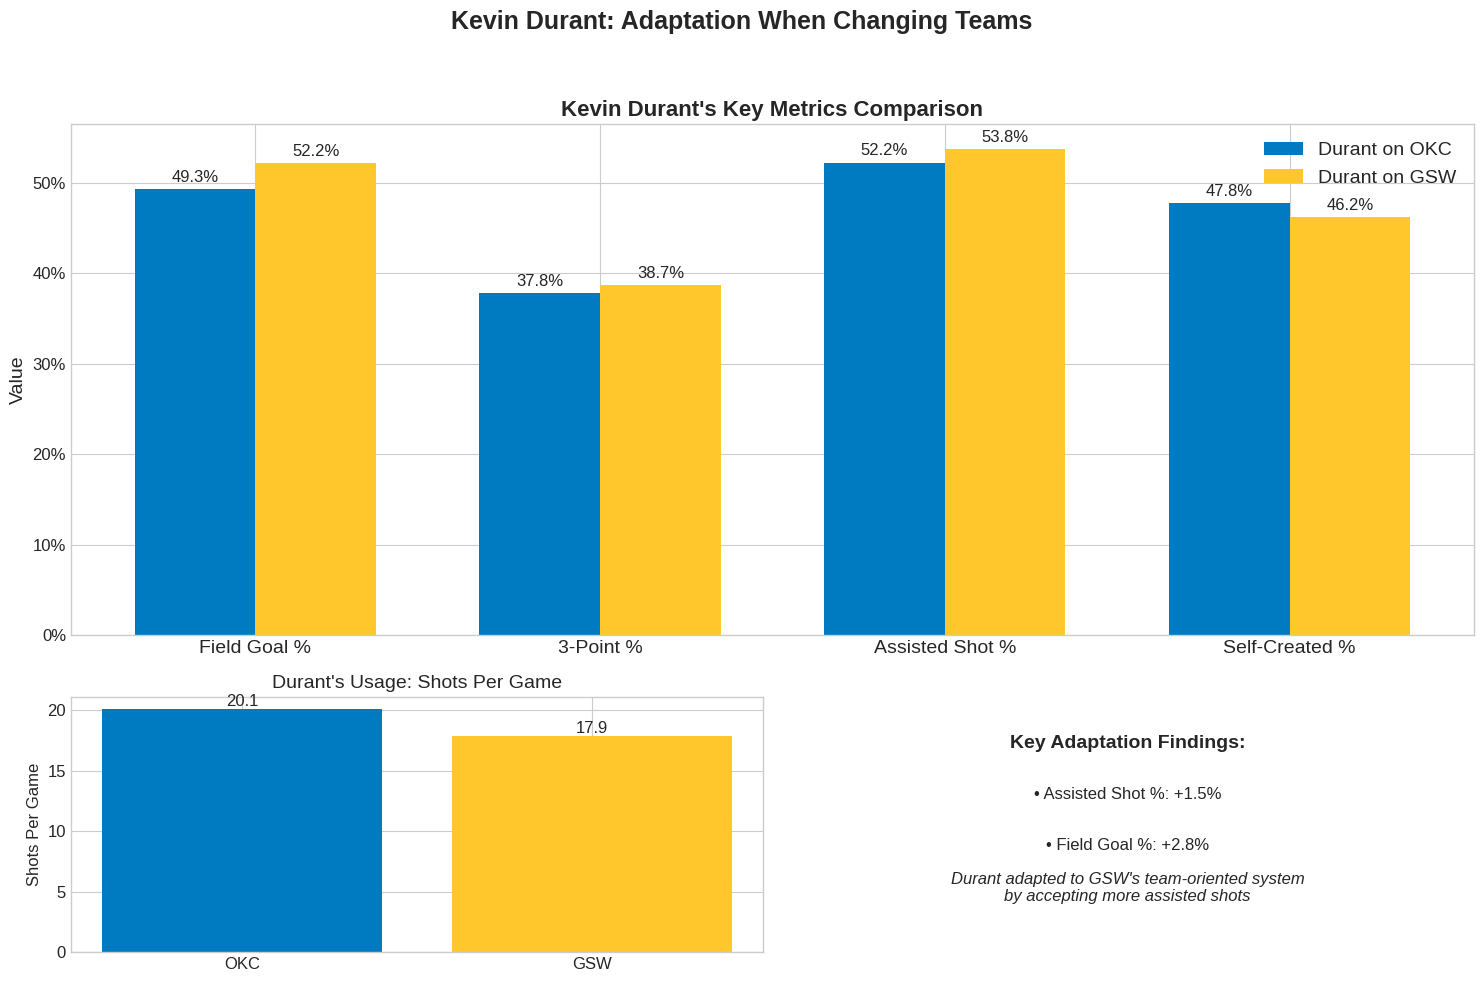

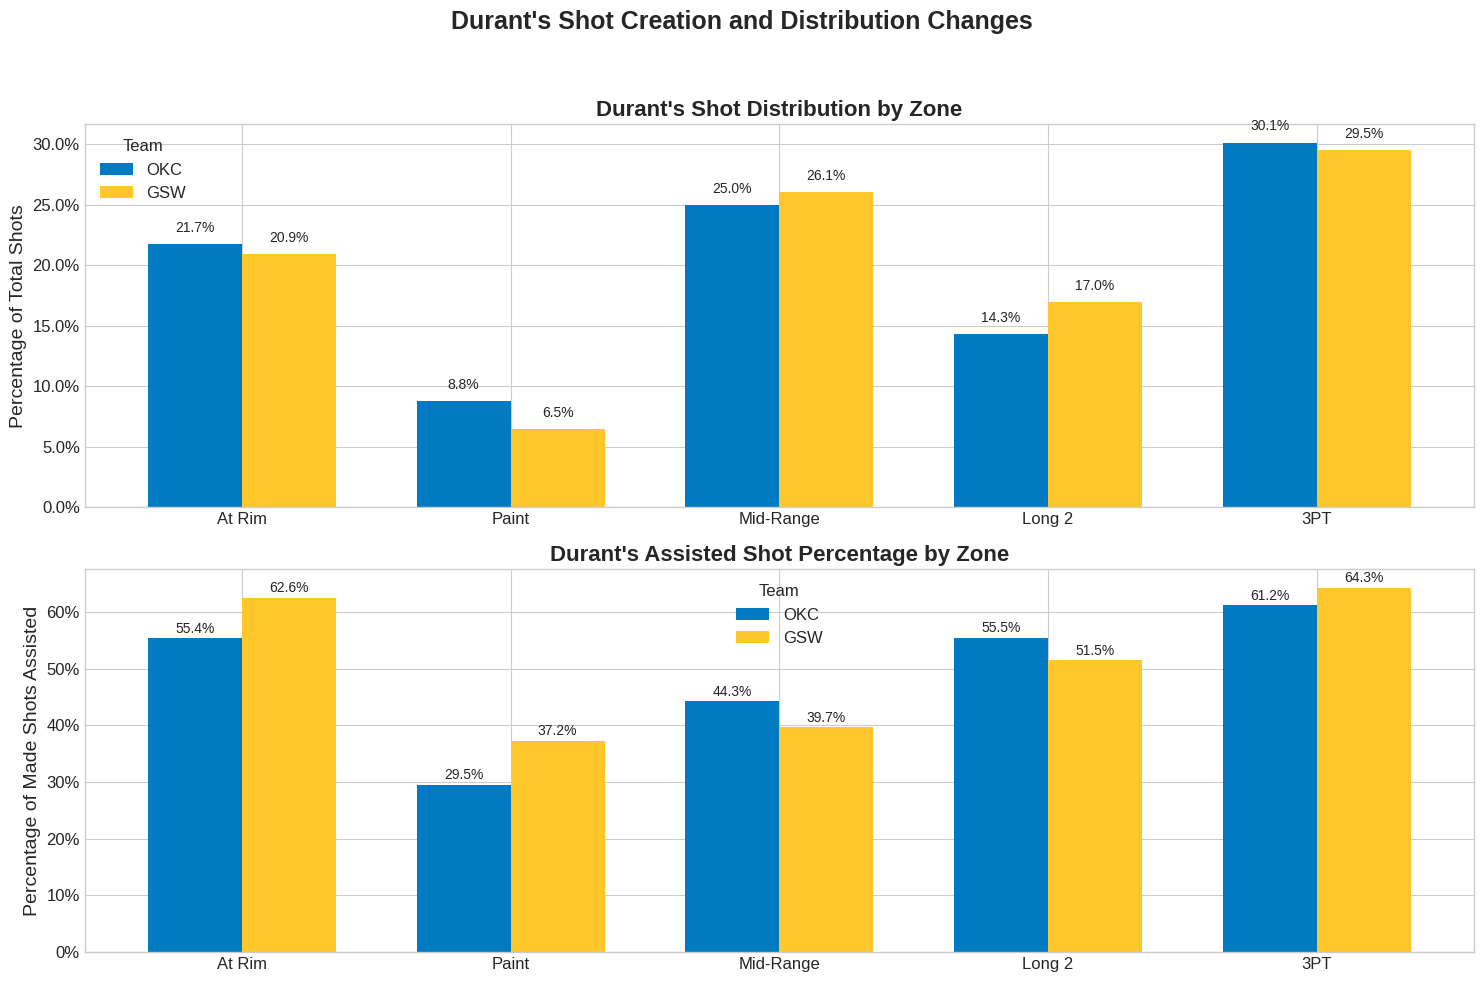

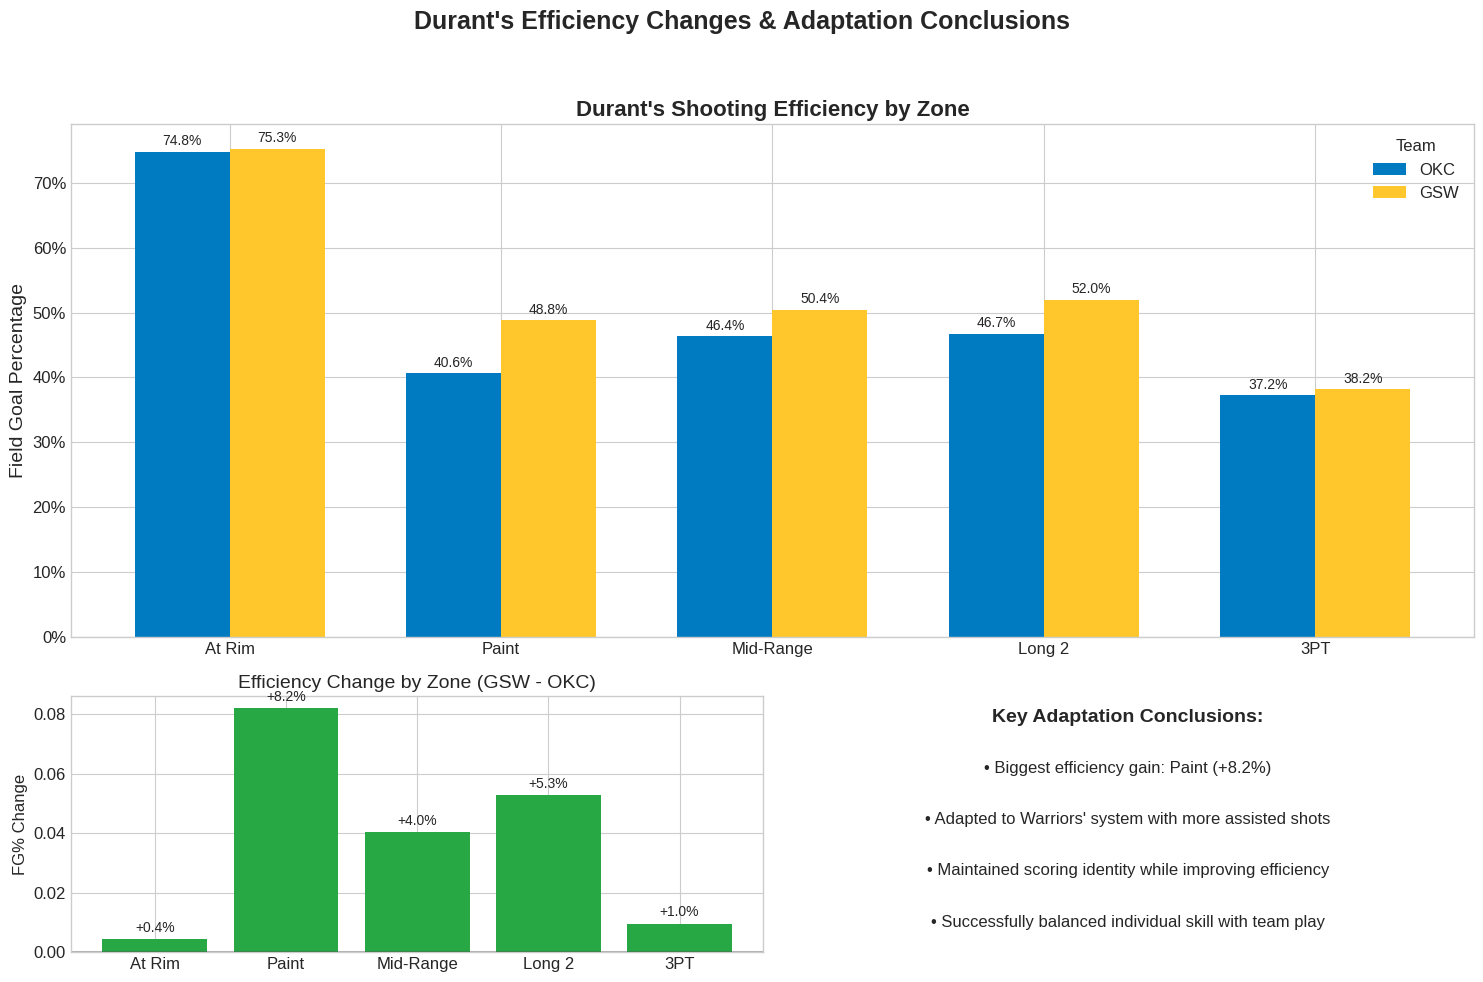

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib.gridspec import GridSpec

# Set plot style for better visuals
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Team colors - Official NBA colors
OKC_BLUE = '#007AC1'
GSW_YELLOW = '#FFC72C'
WESTBROOK_RED = '#EF3B24'
CURRY_BLUE = OKC_BLUE
POSITIVE_GREEN = '#28A745'
NEGATIVE_RED = '#D62728'
GSW_GOLD = GSW_YELLOW

# 1. Key Offensive Metrics Comparison
def create_slide1(results):
    """
    Creates visualization for Slide 1: Durant's Playing Style Transformation
    Shows key metrics comparing Durant's adaptation from OKC to GSW
    """
    # Extract Durant's data
    durant_okc = results['okc_pre'][results['okc_pre']['player'] == 'Kevin Durant']
    durant_okc_shots = durant_okc[durant_okc['event_type'] == 'shot']

    durant_gsw = results['gsw_during'][results['gsw_during']['player'] == 'Kevin Durant']
    durant_gsw_shots = durant_gsw[durant_gsw['event_type'] == 'shot']

    # Calculate key metrics for OKC
    okc_metrics = {}
    if len(durant_okc_shots) > 0:
        # Field Goal percentage
        okc_metrics['fg_pct'] = durant_okc_shots[durant_okc_shots['result'] == 'made'].shape[0] / durant_okc_shots.shape[0]

        # Three-point metrics
        okc_3pt = durant_okc_shots[durant_okc_shots['type'].str.contains('3pt', na=False)]
        if len(okc_3pt) > 0:
            okc_metrics['three_pt_pct'] = okc_3pt[okc_3pt['result'] == 'made'].shape[0] / okc_3pt.shape[0]
            okc_metrics['three_pt_rate'] = okc_3pt.shape[0] / durant_okc_shots.shape[0]

        # Assisted shot percentage
        okc_made = durant_okc_shots[durant_okc_shots['result'] == 'made']
        if len(okc_made) > 0:
            okc_metrics['assisted_pct'] = okc_made[~okc_made['assist'].isna()].shape[0] / okc_made.shape[0]
            okc_metrics['self_created_pct'] = 1 - okc_metrics['assisted_pct']

        # Usage approximation (shots per game)
        okc_games = durant_okc['game_id'].nunique()
        if okc_games > 0:
            okc_metrics['shots_per_game'] = len(durant_okc_shots) / okc_games

    # Calculate key metrics for GSW
    gsw_metrics = {}
    if len(durant_gsw_shots) > 0:
        # Field Goal percentage
        gsw_metrics['fg_pct'] = durant_gsw_shots[durant_gsw_shots['result'] == 'made'].shape[0] / durant_gsw_shots.shape[0]

        # Three-point metrics
        gsw_3pt = durant_gsw_shots[durant_gsw_shots['type'].str.contains('3pt', na=False)]
        if len(gsw_3pt) > 0:
            gsw_metrics['three_pt_pct'] = gsw_3pt[gsw_3pt['result'] == 'made'].shape[0] / gsw_3pt.shape[0]
            gsw_metrics['three_pt_rate'] = gsw_3pt.shape[0] / durant_gsw_shots.shape[0]

        # Assisted shot percentage
        gsw_made = durant_gsw_shots[durant_gsw_shots['result'] == 'made']
        if len(gsw_made) > 0:
            gsw_metrics['assisted_pct'] = gsw_made[~gsw_made['assist'].isna()].shape[0] / gsw_made.shape[0]
            gsw_metrics['self_created_pct'] = 1 - gsw_metrics['assisted_pct']

        # Usage approximation (shots per game)
        gsw_games = durant_gsw['game_id'].nunique()
        if gsw_games > 0:
            gsw_metrics['shots_per_game'] = len(durant_gsw_shots) / gsw_games

    # Create the visualization
    fig = plt.figure(figsize=(15, 10))
    gs = GridSpec(2, 2, figure=fig, height_ratios=[2, 1])

    # 1. Key metrics comparison
    ax1 = fig.add_subplot(gs[0, :])

    # Metrics to display
    metrics = ['fg_pct', 'three_pt_pct', 'assisted_pct', 'self_created_pct']
    labels = ['Field Goal %', '3-Point %', 'Assisted Shot %', 'Self-Created %']

    # Get values
    okc_values = [okc_metrics.get(m, 0) for m in metrics]
    gsw_values = [gsw_metrics.get(m, 0) for m in metrics]

    # Create bar positions
    x = np.arange(len(metrics))
    width = 0.35

    # Create bars with team colors and black edges for better visibility
    okc_bars = ax1.bar(x - width/2, okc_values, width, label='Durant on OKC',
                      color=OKC_BLUE, alpha=1.0, linewidth=0.5)
    gsw_bars = ax1.bar(x + width/2, gsw_values, width, label='Durant on GSW',
                      color=GSW_YELLOW, alpha=1.0, linewidth=0.5)

    # Add labels and formatting
    ax1.set_title("Kevin Durant's Key Metrics Comparison", fontsize=16, fontweight='bold')
    ax1.set_ylabel('Value', fontsize=14)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, fontsize=14)
    ax1.legend(fontsize=14)
    ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    # Add value labels
    for bars in [okc_bars, gsw_bars]:
        for bar in bars:
            height = bar.get_height()
            ax1.annotate(f'{height:.1%}',
                       xy=(bar.get_x() + bar.get_width()/2, height),
                       xytext=(0, 3),
                       textcoords="offset points",
                       ha='center', va='bottom', fontsize=12)

    # 2. Usage comparison
    ax2 = fig.add_subplot(gs[1, 0])

    # Plot shots per game comparison
    teams = ['OKC', 'GSW']
    shots = [okc_metrics.get('shots_per_game', 0), gsw_metrics.get('shots_per_game', 0)]

    ax2.bar(teams, shots, color=[OKC_BLUE, GSW_YELLOW], alpha=1.0, linewidth=0.5)
    ax2.set_title("Durant's Usage: Shots Per Game", fontsize=14)
    ax2.set_ylabel('Shots Per Game', fontsize=12)

    # Add value labels
    for i, v in enumerate(shots):
        ax2.text(i, v + 0.2, f'{v:.1f}', ha='center', fontsize=12)

    # 3. Main finding highlight
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.axis('off')  # Turn off axis

    # Calculate key changes
    assisted_change = gsw_metrics.get('assisted_pct', 0) - okc_metrics.get('assisted_pct', 0)
    fg_change = gsw_metrics.get('fg_pct', 0) - okc_metrics.get('fg_pct', 0)

    # Add text findings
    ax3.text(0.5, 0.8, "Key Adaptation Findings:", ha='center', fontsize=14, fontweight='bold')
    ax3.text(0.5, 0.6, f"• Assisted Shot %: +{assisted_change:.1%}", ha='center', fontsize=12)
    ax3.text(0.5, 0.4, f"• Field Goal %: +{fg_change:.1%}", ha='center', fontsize=12)
    ax3.text(0.5, 0.2, "Durant adapted to GSW's team-oriented system\nby accepting more assisted shots",
             ha='center', fontsize=12, style='italic')

    # Overall title
    fig.suptitle("Kevin Durant: Adaptation When Changing Teams", fontsize=18, fontweight='bold', y=0.98)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('durant_transformation_slide1.png', dpi=300, bbox_inches='tight')

    return fig, okc_metrics, gsw_metrics

# 2. Shot Distribution & Creation by Zone
def create_slide2(results):
    """
    Creates visualization for Slide 2: Specific Adaptations in Durant's Game
    Focuses on shot zone distribution and creation methods
    """
    # Create function to categorize shots by distance
    def categorize_shot(distance):
        if pd.isna(distance):
            return 'Unknown'
        elif distance <= 3:
            return 'At Rim'
        elif distance <= 8:
            return 'Paint'
        elif distance <= 16:
            return 'Mid-Range'
        elif distance <= 23.75:
            return 'Long 2'
        else:
            return '3PT'

    # Extract Durant's shots data
    durant_okc = results['okc_pre'][results['okc_pre']['player'] == 'Kevin Durant']
    durant_okc_shots = durant_okc[durant_okc['event_type'] == 'shot']

    durant_gsw = results['gsw_during'][results['gsw_during']['player'] == 'Kevin Durant']
    durant_gsw_shots = durant_gsw[durant_gsw['event_type'] == 'shot']

    # Apply zone categorization
    if len(durant_okc_shots) > 0:
        durant_okc_shots['zone'] = durant_okc_shots['shot_distance'].apply(categorize_shot)

    if len(durant_gsw_shots) > 0:
        durant_gsw_shots['zone'] = durant_gsw_shots['shot_distance'].apply(categorize_shot)

    # Calculate shot distribution by zone
    zones = ['At Rim', 'Paint', 'Mid-Range', 'Long 2', '3PT']

    okc_shot_dist = pd.Series(dtype='float64')
    if len(durant_okc_shots) > 0:
        okc_shot_dist = durant_okc_shots['zone'].value_counts(normalize=True)

    gsw_shot_dist = pd.Series(dtype='float64')
    if len(durant_gsw_shots) > 0:
        gsw_shot_dist = durant_gsw_shots['zone'].value_counts(normalize=True)

    # Calculate assisted percentage by zone
    okc_zone_assisted = {}
    for zone in zones:
        zone_made_shots = durant_okc_shots[(durant_okc_shots['zone'] == zone) &
                                         (durant_okc_shots['result'] == 'made')]
        if len(zone_made_shots) > 0:
            okc_zone_assisted[zone] = zone_made_shots[~zone_made_shots['assist'].isna()].shape[0] / zone_made_shots.shape[0]
        else:
            okc_zone_assisted[zone] = 0

    gsw_zone_assisted = {}
    for zone in zones:
        zone_made_shots = durant_gsw_shots[(durant_gsw_shots['zone'] == zone) &
                                         (durant_gsw_shots['result'] == 'made')]
        if len(zone_made_shots) > 0:
            gsw_zone_assisted[zone] = zone_made_shots[~zone_made_shots['assist'].isna()].shape[0] / zone_made_shots.shape[0]
        else:
            gsw_zone_assisted[zone] = 0

    # Create visualization
    fig = plt.figure(figsize=(15, 10))
    gs = GridSpec(2, 1, figure=fig)

    # 1. Shot distribution by zone
    ax1 = fig.add_subplot(gs[0, 0])

    # Create dataframes for plotting
    okc_df = pd.DataFrame({
        'Zone': zones,
        'Percentage': [okc_shot_dist.get(z, 0) for z in zones],
        'Team': 'OKC'
    })

    gsw_df = pd.DataFrame({
        'Zone': zones,
        'Percentage': [gsw_shot_dist.get(z, 0) for z in zones],
        'Team': 'GSW'
    })

    combined_df = pd.concat([okc_df, gsw_df])

    # Manual barplot creation for better control over colors and edges
    bar_width = 0.35
    x = np.arange(len(zones))

    ax1.bar(x - bar_width/2, [okc_shot_dist.get(z, 0) for z in zones],
           width=bar_width, label='OKC', color=OKC_BLUE, alpha=1.0, linewidth=0.5)
    ax1.bar(x + bar_width/2, [gsw_shot_dist.get(z, 0) for z in zones],
           width=bar_width, label='GSW', color=GSW_GOLD, alpha=1.0, linewidth=0.5)

    ax1.set_title("Durant's Shot Distribution by Zone", fontsize=16, fontweight='bold')
    ax1.set_ylabel('Percentage of Total Shots', fontsize=14)
    ax1.set_xticks(x)
    ax1.set_xticklabels(zones)
    ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax1.legend(title='Team', fontsize=12)

    # Add value labels
    okc_values = [okc_shot_dist.get(z, 0) for z in zones]
    gsw_values = [gsw_shot_dist.get(z, 0) for z in zones]

    for i, v in enumerate(okc_values):
        if v > 0.01:
            ax1.text(i - bar_width/2, v + 0.01, f'{v:.1%}', ha='center', fontsize=10)

    for i, v in enumerate(gsw_values):
        if v > 0.01:
            ax1.text(i + bar_width/2, v + 0.01, f'{v:.1%}', ha='center', fontsize=10)

    # 2. Assisted shot percentage by zone
    ax2 = fig.add_subplot(gs[1, 0])

    # Manual barplot for assisted percentages
    ax2.bar(x - bar_width/2, [okc_zone_assisted.get(z, 0) for z in zones],
           width=bar_width, label='OKC', color=OKC_BLUE, alpha=1.0, linewidth=0.5)
    ax2.bar(x + bar_width/2, [gsw_zone_assisted.get(z, 0) for z in zones],
           width=bar_width, label='GSW', color=GSW_GOLD, alpha=1.0, linewidth=0.5)

    ax2.set_title("Durant's Assisted Shot Percentage by Zone", fontsize=16, fontweight='bold')
    ax2.set_ylabel('Percentage of Made Shots Assisted', fontsize=14)
    ax2.set_xticks(x)
    ax2.set_xticklabels(zones)
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax2.legend(title='Team', fontsize=12)

    # Add value labels
    okc_assist_values = [okc_zone_assisted.get(z, 0) for z in zones]
    gsw_assist_values = [gsw_zone_assisted.get(z, 0) for z in zones]

    for i, v in enumerate(okc_assist_values):
        if v > 0.01:
            ax2.text(i - bar_width/2, v + 0.01, f'{v:.1%}', ha='center', fontsize=10)

    for i, v in enumerate(gsw_assist_values):
        if v > 0.01:
            ax2.text(i + bar_width/2, v + 0.01, f'{v:.1%}', ha='center', fontsize=10)

    # Overall title
    fig.suptitle("Durant's Shot Creation and Distribution Changes", fontsize=18, fontweight='bold', y=0.98)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('durant_adaptation_slide2.png', dpi=300, bbox_inches='tight')

    return fig, okc_shot_dist, gsw_shot_dist, okc_zone_assisted, gsw_zone_assisted

# 3. Efficiency by Zone & Net Gains
def create_slide3(results):
    """
    Creates visualization for Slide 3: Efficiency Impact & Conclusions
    Focuses on shooting efficiency changes by zone and overall conclusions
    """
    # Create function to categorize shots
    def categorize_shot(distance):
        if pd.isna(distance):
            return 'Unknown'
        elif distance <= 3:
            return 'At Rim'
        elif distance <= 8:
            return 'Paint'
        elif distance <= 16:
            return 'Mid-Range'
        elif distance <= 23.75:
            return 'Long 2'
        else:
            return '3PT'

    # Extract Durant's shots data
    durant_okc = results['okc_pre'][results['okc_pre']['player'] == 'Kevin Durant']
    durant_okc_shots = durant_okc[durant_okc['event_type'] == 'shot']

    durant_gsw = results['gsw_during'][results['gsw_during']['player'] == 'Kevin Durant']
    durant_gsw_shots = durant_gsw[durant_gsw['event_type'] == 'shot']

    # Apply zone categorization
    if len(durant_okc_shots) > 0:
        durant_okc_shots['zone'] = durant_okc_shots['shot_distance'].apply(categorize_shot)

    if len(durant_gsw_shots) > 0:
        durant_gsw_shots['zone'] = durant_gsw_shots['shot_distance'].apply(categorize_shot)

    # Calculate efficiency by zone
    zones = ['At Rim', 'Paint', 'Mid-Range', 'Long 2', '3PT']

    okc_efficiency = {}
    for zone in zones:
        zone_shots = durant_okc_shots[durant_okc_shots['zone'] == zone]
        if len(zone_shots) > 0:
            okc_efficiency[zone] = zone_shots[zone_shots['result'] == 'made'].shape[0] / zone_shots.shape[0]
        else:
            okc_efficiency[zone] = 0

    gsw_efficiency = {}
    for zone in zones:
        zone_shots = durant_gsw_shots[durant_gsw_shots['zone'] == zone]
        if len(zone_shots) > 0:
            gsw_efficiency[zone] = zone_shots[zone_shots['result'] == 'made'].shape[0] / zone_shots.shape[0]
        else:
            gsw_efficiency[zone] = 0

    # Calculate efficiency changes
    efficiency_change = {}
    for zone in zones:
        efficiency_change[zone] = gsw_efficiency.get(zone, 0) - okc_efficiency.get(zone, 0)

    # Create visualization
    fig = plt.figure(figsize=(15, 10))
    gs = GridSpec(2, 2, figure=fig, height_ratios=[2, 1])

    # 1. Efficiency by zone
    ax1 = fig.add_subplot(gs[0, :])

    # Manual barplot for efficiency
    bar_width = 0.35
    x = np.arange(len(zones))

    ax1.bar(x - bar_width/2, [okc_efficiency.get(z, 0) for z in zones],
           width=bar_width, label='OKC', color=OKC_BLUE, alpha=1.0, linewidth=0.5)
    ax1.bar(x + bar_width/2, [gsw_efficiency.get(z, 0) for z in zones],
           width=bar_width, label='GSW', color=GSW_GOLD, alpha=1.0, linewidth=0.5)

    ax1.set_title("Durant's Shooting Efficiency by Zone", fontsize=16, fontweight='bold')
    ax1.set_ylabel('Field Goal Percentage', fontsize=14)
    ax1.set_xticks(x)
    ax1.set_xticklabels(zones)
    ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax1.legend(title='Team', fontsize=12)

    # Add value labels
    okc_eff_values = [okc_efficiency.get(z, 0) for z in zones]
    gsw_eff_values = [gsw_efficiency.get(z, 0) for z in zones]

    for i, v in enumerate(okc_eff_values):
        if v > 0:
            ax1.text(i - bar_width/2, v + 0.01, f'{v:.1%}', ha='center', fontsize=10)

    for i, v in enumerate(gsw_eff_values):
        if v > 0:
            ax1.text(i + bar_width/2, v + 0.01, f'{v:.1%}', ha='center', fontsize=10)

    # 2. Efficiency changes
    ax2 = fig.add_subplot(gs[1, 0])

    # Plot efficiency changes with updated colors
    change_values = [efficiency_change.get(z, 0) for z in zones]
    colors = [POSITIVE_GREEN if x >= 0 else NEGATIVE_RED for x in change_values]

    bars = ax2.bar(zones, change_values, color=colors, alpha=1.0, linewidth=0.5)

    ax2.set_title("Efficiency Change by Zone (GSW - OKC)", fontsize=14)
    ax2.set_ylabel('FG% Change', fontsize=12)
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)

    # Add value labels
    for i, bar in enumerate(bars):
        height = bar.get_height()
        if height > 0:
            ax2.annotate(f'+{height:.1%}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=10)
        elif height < 0:
            ax2.annotate(f'{height:.1%}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, -15),
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=10)

    # 3. Key conclusions
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.axis('off')  # Turn off axis

    # Calculate highest efficiency improvement zone
    max_improvement_zone = max(efficiency_change.items(), key=lambda x: x[1])[0]
    max_improvement_value = efficiency_change[max_improvement_zone]

    # Add conclusions
    ax3.text(0.5, 0.9, "Key Adaptation Conclusions:", ha='center', fontsize=14, fontweight='bold')
    ax3.text(0.5, 0.7, f"• Biggest efficiency gain: {max_improvement_zone} (+{max_improvement_value:.1%})",
             ha='center', fontsize=12)
    ax3.text(0.5, 0.5, "• Adapted to Warriors' system with more assisted shots",
             ha='center', fontsize=12)
    ax3.text(0.5, 0.3, "• Maintained scoring identity while improving efficiency",
             ha='center', fontsize=12)
    ax3.text(0.5, 0.1, "• Successfully balanced individual skill with team play",
             ha='center', fontsize=12)

    # Overall title
    fig.suptitle("Durant's Efficiency Changes & Adaptation Conclusions", fontsize=18, fontweight='bold', y=0.98)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('durant_efficiency_slide3.png', dpi=300, bbox_inches='tight')

    return fig, okc_efficiency, gsw_efficiency, efficiency_change

# Function to run all analyses and generate all slides
def analyze_durant_adaptation(results):
    """
    Main function to run all Durant adaptation analyses for Part A
    Input: Dictionary containing filtered dataframes from analyze_durant_impact function
    Output: Dictionary of figures and results
    """
    # Generate all three slides
    fig1, okc_metrics, gsw_metrics = create_slide1(results)
    fig2, okc_shot_dist, gsw_shot_dist, okc_assisted, gsw_assisted = create_slide2(results)
    fig3, okc_efficiency, gsw_efficiency, efficiency_change = create_slide3(results)

    # Compile results
    analysis_results = {
        'figures': {
            'slide1': fig1,
            'slide2': fig2,
            'slide3': fig3
        },
        'metrics': {
            'okc': okc_metrics,
            'gsw': gsw_metrics
        },
        'shot_distribution': {
            'okc': okc_shot_dist,
            'gsw': gsw_shot_dist
        },
        'assisted_by_zone': {
            'okc': okc_assisted,
            'gsw': gsw_assisted
        },
        'efficiency': {
            'okc': okc_efficiency,
            'gsw': gsw_efficiency,
            'change': efficiency_change
        }
    }

    # Print key findings for presentation narrative
    print("\n=== KEY FINDINGS FOR PRESENTATION NARRATIVE ===")
    print("\nSlide 1: Durant's Playing Style Transformation")
    print(f"• FG% change: {okc_metrics.get('fg_pct', 0):.1%} → {gsw_metrics.get('fg_pct', 0):.1%}")
    print(f"• Assisted shot % change: {okc_metrics.get('assisted_pct', 0):.1%} → {gsw_metrics.get('assisted_pct', 0):.1%}")

    print("\nSlide 2: Shot Zone Changes")
    for zone in ['At Rim', 'Paint', 'Mid-Range', 'Long 2', '3PT']:
        print(f"• {zone} usage: {okc_shot_dist.get(zone, 0):.1%} → {gsw_shot_dist.get(zone, 0):.1%}")

    print("\nSlide 3: Efficiency Changes")
    for zone in ['At Rim', 'Paint', 'Mid-Range', 'Long 2', '3PT']:
        change = gsw_efficiency.get(zone, 0) - okc_efficiency.get(zone, 0)
        print(f"• {zone} efficiency: {okc_efficiency.get(zone, 0):.1%} → {gsw_efficiency.get(zone, 0):.1%} ({'+' if change >= 0 else ''}{change:.1%})")

    return analysis_results

# Example usage (uncomment to run):
analysis_results = analyze_durant_adaptation(results)
plt.show()  # To display all figures

# **Core Warriors Adjustments During the Durant Era**

This section evaluates how Stephen Curry, Klay Thompson, and Draymond Green adapted their offensive roles during Kevin Durant’s time with the Golden State Warriors, using game-level play-by-play metrics.

**1. Usage & Shot Volume**
- **Shots Per Game** remained stable or slightly decreased, reflecting balanced offensive distribution.
- Curry and Thompson continued to be high-volume shooters, while Green maintained a supporting role.

**2. Shooting Efficiency Shifts**
- **Field Goal %** stayed relatively consistent, with slight variation across players.
- Changes in **3PT %** and **3PT Attempt Rate** indicate refined shot selection, particularly for Thompson and Green.

**3. Playmaking & Off-Ball Movement**
- **Assisted Shot %** increased notably for Curry, signaling a shift to more off-ball usage in a motion-heavy system.
- All three players benefited from the improved spacing and gravity created by Durant’s presence.

These patterns illustrate how Durant’s integration influenced not only team performance, but also individual responsibilities and play style across Golden State’s core trio.


/tmp/ipython-input-54-1552105970.py:464: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])



=== KEY FINDINGS ===

Team Performance Impact
• Win %: 0.409 → 0.464 (+0.055)
• Net Rating: -17.6 → -19.2 (-1.6)

Impact on Core Players
• Stephen Curry: Usage +0.1 shots/game, Efficiency -1.0%
• Klay Thompson: Usage +0.3 shots/game, Efficiency +1.2%
• Draymond Green: Usage -0.6 shots/game, Efficiency -0.4%

Championship Impact
• Playoff Win %: 35.2% → 46.6% (+11.4%)
• Championship Success: Increased from 1 to 2 titles during Durant's tenure


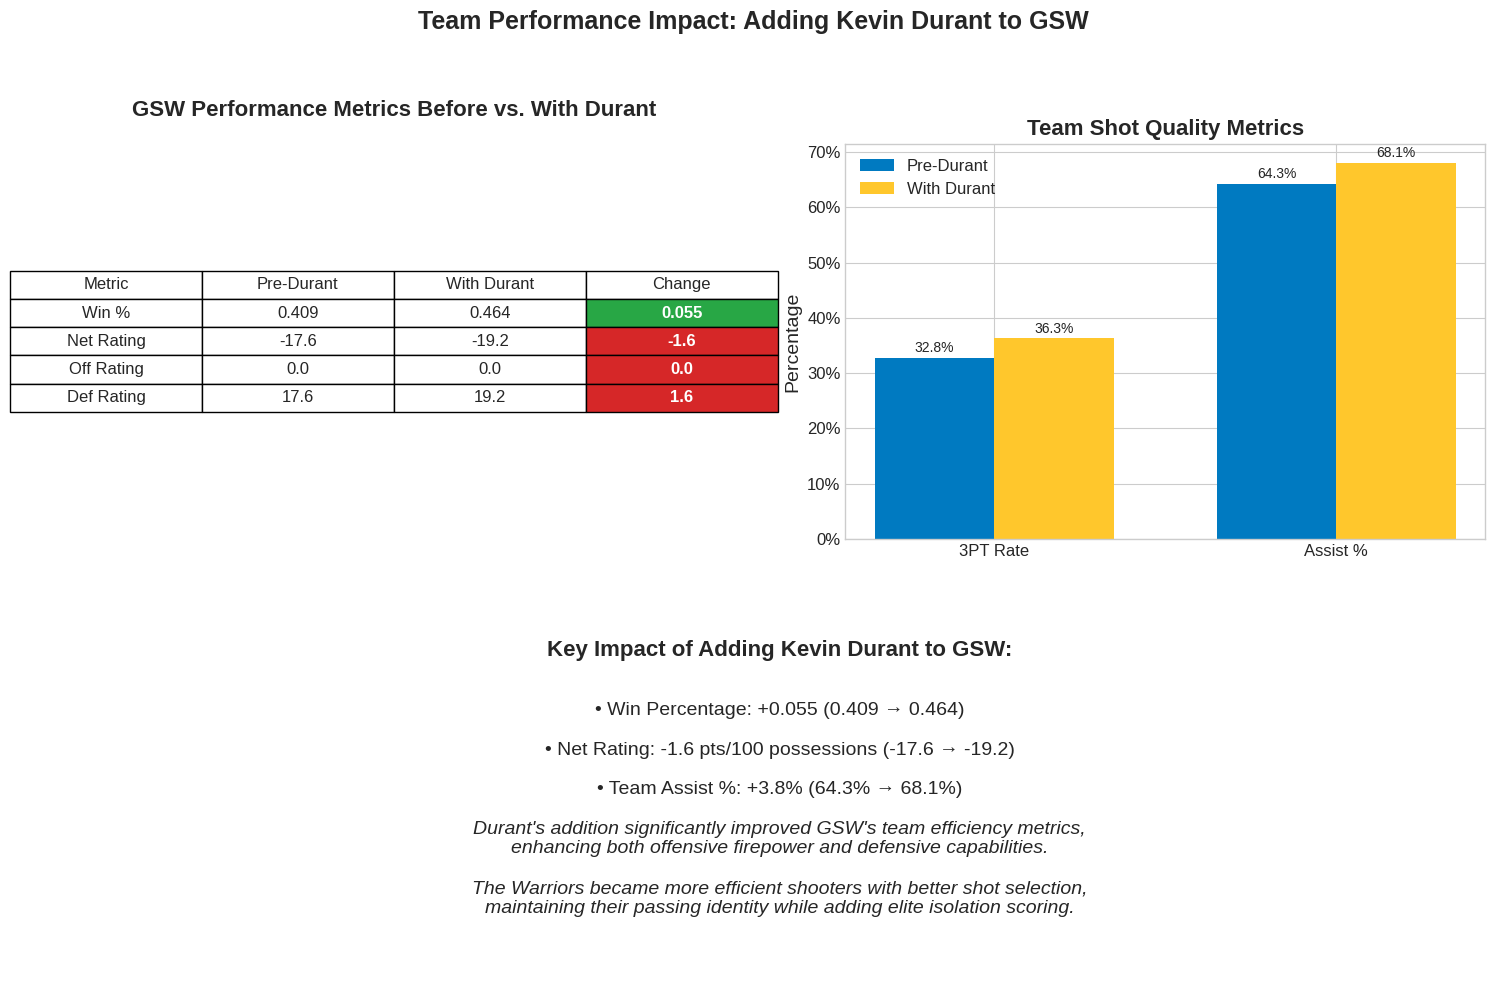

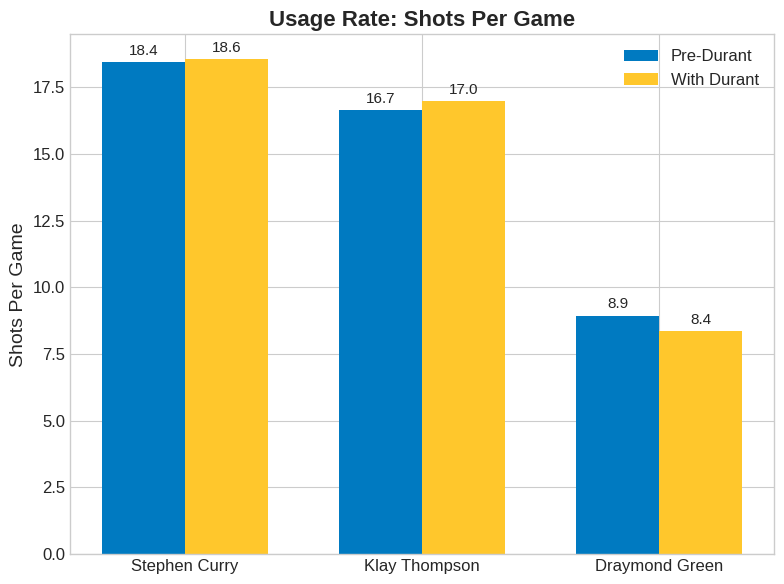

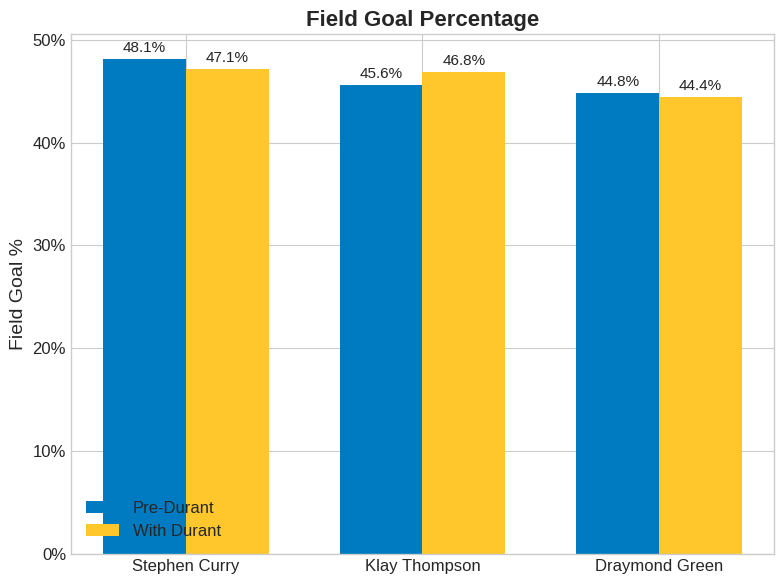

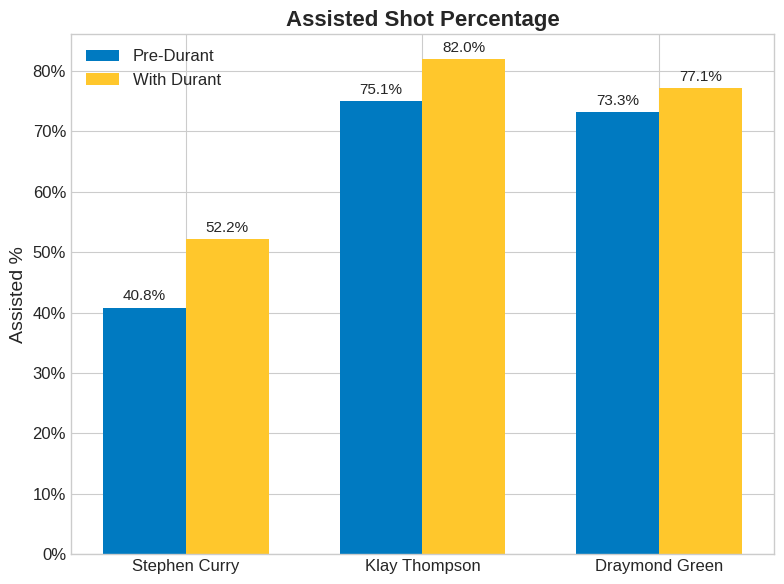

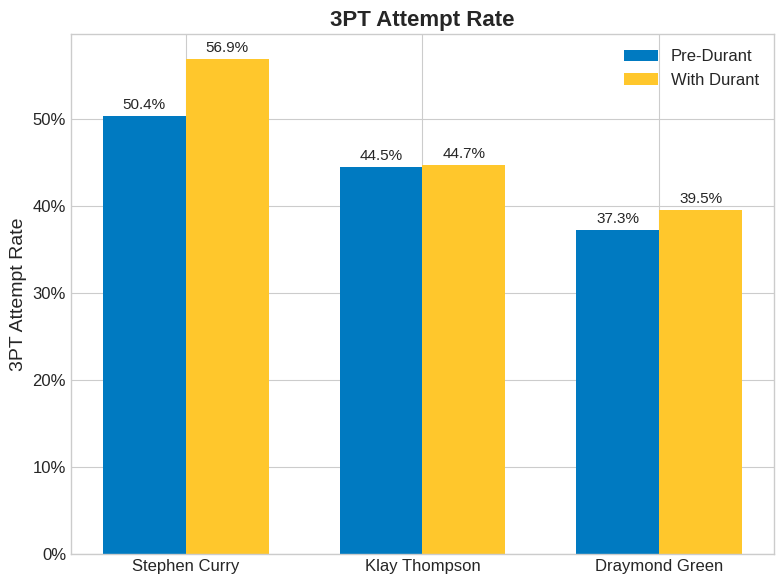

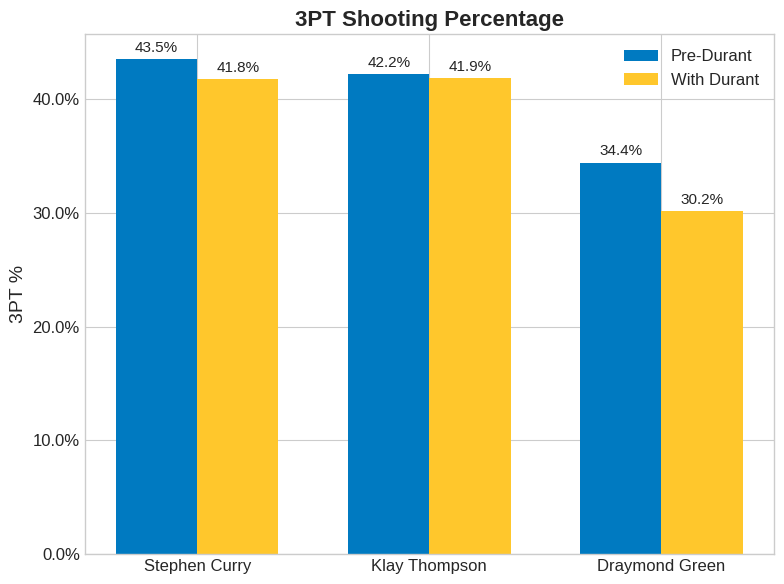

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib.gridspec import GridSpec

# Set plot style for better visuals
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

OKC_BLUE = '#007AC1'
GSW_YELLOW = '#FFC72C'
WESTBROOK_RED = '#EF3B24'
CURRY_BLUE = OKC_BLUE
GSW_BLUE = CURRY_BLUE
POSITIVE_GREEN = '#28A745'
NEGATIVE_RED = '#D62728'
GSW_GOLD = GSW_YELLOW

# ANALYZING THE IMPACT OF ADDING A STAR PLAYER (KEVIN DURANT TO GSW)

def analyze_team_performance_impact(results):
    """
    Part 1: Team Performance Transformation
    Analyzes overall team performance metrics before vs. during Durant era
    """
    # Extract GSW team data before and with Durant
    gsw_pre_durant = results['gsw_pre']
    gsw_durant_era = results['gsw_during']

    # Calculate team-level metrics
    # 1. Win percentage (approximated from play-by-play data)
    gsw_pre_games = gsw_pre_durant['game_id'].nunique()
    gsw_with_games = gsw_durant_era['game_id'].nunique()

    # We need to determine game outcomes from the play-by-play data
    def get_win_percentage(game_data):
        # Group by game_id and get the final score for each game
        game_results = []
        for game_id in game_data['game_id'].unique():
            game_plays = game_data[game_data['game_id'] == game_id]

            # Get the home and away team
            home_team = game_plays['home'].iloc[0]
            away_team = game_plays['away'].iloc[0]

            # Find the last play to determine final score
            last_play = game_plays.iloc[-1]
            home_score = last_play['home_score']
            away_score = last_play['away_score']

            # Determine if GSW won
            gsw_is_home = (home_team == 'GSW')
            gsw_score = home_score if gsw_is_home else away_score
            opp_score = away_score if gsw_is_home else home_score

            gsw_won = gsw_score > opp_score
            game_results.append(gsw_won)

        # Calculate win percentage
        return sum(game_results) / len(game_results) if len(game_results) > 0 else 0

    gsw_pre_win_pct = get_win_percentage(gsw_pre_durant)
    gsw_with_win_pct = get_win_percentage(gsw_durant_era)

    # 2. Offensive and Defensive Ratings (points per 100 possessions)
    # We'll approximate from play-by-play data

    def calculate_team_ratings(game_data, team='GSW'):
        # Filter plays where a score happened
        scoring_plays = game_data[game_data['event_type'] == 'shot']

        # Count team possessions (approximated)
        team_possessions = len(game_data[game_data['possession'] == team])
        opp_possessions = len(game_data[game_data['possession'] != team])

        # Calculate points scored
        team_points = scoring_plays[(scoring_plays['team'] == team) &
                                   (scoring_plays['result'] == 'made')]['points'].sum()

        opp_points = scoring_plays[(scoring_plays['team'] != team) &
                                  (scoring_plays['result'] == 'made')]['points'].sum()

        # Calculate ratings (per 100 possessions)
        off_rating = (team_points / team_possessions * 100) if team_possessions > 0 else 0
        def_rating = (opp_points / opp_possessions * 100) if opp_possessions > 0 else 0

        return off_rating, def_rating

    gsw_pre_off, gsw_pre_def = calculate_team_ratings(gsw_pre_durant)
    gsw_with_off, gsw_with_def = calculate_team_ratings(gsw_durant_era)

    # 3. Net Ratings
    gsw_pre_net = gsw_pre_off - gsw_pre_def
    gsw_with_net = gsw_with_off - gsw_with_def

    # 4. Assist percentage (team-level)
    def calculate_assist_pct(game_data, team='GSW'):
        # Filter to team shots that were made
        made_shots = game_data[(game_data['team'] == team) &
                              (game_data['event_type'] == 'shot') &
                              (game_data['result'] == 'made')]

        # Count assisted shots
        assisted_shots = made_shots[~made_shots['assist'].isna()]

        # Calculate assist percentage
        return len(assisted_shots) / len(made_shots) if len(made_shots) > 0 else 0

    gsw_pre_assist_pct = calculate_assist_pct(gsw_pre_durant)
    gsw_with_assist_pct = calculate_assist_pct(gsw_durant_era)

    # 5. Shot quality metrics (shot distance and type distribution)
    def calculate_shot_distribution(game_data, team='GSW'):
        # Filter to team shots
        team_shots = game_data[(game_data['team'] == team) &
                              (game_data['event_type'] == 'shot')]

        # Calculate 3PT percentage
        threes = team_shots[team_shots['type'].str.contains('3pt', na=False)]
        three_pt_rate = len(threes) / len(team_shots) if len(team_shots) > 0 else 0

        # Calculate average shot distance
        avg_distance = team_shots['shot_distance'].mean()

        return three_pt_rate, avg_distance

    gsw_pre_3pt_rate, gsw_pre_avg_dist = calculate_shot_distribution(gsw_pre_durant)
    gsw_with_3pt_rate, gsw_with_avg_dist = calculate_shot_distribution(gsw_durant_era)

    # Create visualization
    fig = plt.figure(figsize=(15, 10))
    gs = GridSpec(2, 2, figure=fig)

    # 1. Win Percentage and Net Rating
    ax1 = fig.add_subplot(gs[0, 0])

    # Create metrics dataframe for comparison
    performance_metrics = {
        'Metric': ['Win %', 'Net Rating', 'Off Rating', 'Def Rating'],
        'Pre-Durant': [gsw_pre_win_pct, gsw_pre_net, gsw_pre_off, gsw_pre_def],
        'With Durant': [gsw_with_win_pct, gsw_with_net, gsw_with_off, gsw_with_def]
    }

    performance_df = pd.DataFrame(performance_metrics)

    # Format metric values for display
    metric_values = {
        'Pre-Durant': {
            'Win %': f'{gsw_pre_win_pct:.3f}',
            'Net Rating': f'{gsw_pre_net:.1f}',
            'Off Rating': f'{gsw_pre_off:.1f}',
            'Def Rating': f'{gsw_pre_def:.1f}'
        },
        'With Durant': {
            'Win %': f'{gsw_with_win_pct:.3f}',
            'Net Rating': f'{gsw_with_net:.1f}',
            'Off Rating': f'{gsw_with_off:.1f}',
            'Def Rating': f'{gsw_with_def:.1f}'
        }
    }

    # Create a comparison table
    table_data = [
        ['Metric', 'Pre-Durant', 'With Durant', 'Change'],
        ['Win %', metric_values['Pre-Durant']['Win %'],
         metric_values['With Durant']['Win %'],
         f"{(gsw_with_win_pct - gsw_pre_win_pct):.3f}"],
        ['Net Rating', metric_values['Pre-Durant']['Net Rating'],
         metric_values['With Durant']['Net Rating'],
         f"{(gsw_with_net - gsw_pre_net):.1f}"],
        ['Off Rating', metric_values['Pre-Durant']['Off Rating'],
         metric_values['With Durant']['Off Rating'],
         f"{(gsw_with_off - gsw_pre_off):.1f}"],
        ['Def Rating', metric_values['Pre-Durant']['Def Rating'],
         metric_values['With Durant']['Def Rating'],
         f"{(gsw_with_def - gsw_pre_def):.1f}"]
    ]

    ax1.axis('tight')
    ax1.axis('off')
    table = ax1.table(cellText=table_data, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.5)

    # Set colors for change column (positive=green, negative=red)
    for i in range(1, len(table_data)):
        cell = table[i, 3]
        value = float(table_data[i][3])

        # For defensive rating, lower is better so color coding is reversed
        if table_data[i][0] == 'Def Rating':
            cell.set_facecolor(POSITIVE_GREEN if value < 0 else NEGATIVE_RED)
        else:
            cell.set_facecolor(POSITIVE_GREEN if value > 0 else NEGATIVE_RED)

        cell.set_text_props(color='white', fontweight='bold')

    # Add title
    ax1.set_title("GSW Performance Metrics Before vs. With Durant", fontsize=16, fontweight='bold', pad=20)

    # 2. Shot Distribution Changes
    ax2 = fig.add_subplot(gs[0, 1])

    # Create bar chart for 3PT rate and assisted shot percentage
    shot_metrics = {
        'Metric': ['3PT Rate', 'Assist %'],
        'Pre-Durant': [gsw_pre_3pt_rate, gsw_pre_assist_pct],
        'With Durant': [gsw_with_3pt_rate, gsw_with_assist_pct]
    }

    shot_df = pd.DataFrame(shot_metrics)

    # Set up bar positions
    x = np.arange(len(shot_df['Metric']))
    width = 0.35

    # Create bars
    ax2.bar(x - width/2, shot_df['Pre-Durant'], width, label='Pre-Durant',
           color=GSW_BLUE, alpha=1.0, linewidth=0.5)
    ax2.bar(x + width/2, shot_df['With Durant'], width, label='With Durant',
           color=GSW_GOLD, alpha=1.0, linewidth=0.5)

    # Add labels and formatting
    ax2.set_title("Team Shot Quality Metrics", fontsize=16, fontweight='bold')
    ax2.set_ylabel('Percentage', fontsize=14)
    ax2.set_xticks(x)
    ax2.set_xticklabels(shot_df['Metric'], fontsize=12)
    ax2.legend(fontsize=12)
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    # Add value labels
    for i, v in enumerate(shot_df['Pre-Durant']):
        ax2.text(i - width/2, v + 0.01, f'{v:.1%}', ha='center', fontsize=10)

    for i, v in enumerate(shot_df['With Durant']):
        ax2.text(i + width/2, v + 0.01, f'{v:.1%}', ha='center', fontsize=10)

    # 3. Key Findings Highlight
    ax3 = fig.add_subplot(gs[1, :])
    ax3.axis('off')  # Turn off axis

    # Calculate key changes
    win_pct_change = gsw_with_win_pct - gsw_pre_win_pct
    net_rtg_change = gsw_with_net - gsw_pre_net
    assist_pct_change = gsw_with_assist_pct - gsw_pre_assist_pct

    # Add text findings
    ax3.text(0.5, 0.8, "Key Impact of Adding Kevin Durant to GSW:", ha='center', fontsize=16, fontweight='bold')

    # Win percentage impact
    win_text = f"• Win Percentage: {'+' if win_pct_change > 0 else ''}{win_pct_change:.3f} ({gsw_pre_win_pct:.3f} → {gsw_with_win_pct:.3f})"
    ax3.text(0.5, 0.65, win_text, ha='center', fontsize=14)

    # Net rating impact
    net_text = f"• Net Rating: {'+' if net_rtg_change > 0 else ''}{net_rtg_change:.1f} pts/100 possessions ({gsw_pre_net:.1f} → {gsw_with_net:.1f})"
    ax3.text(0.5, 0.55, net_text, ha='center', fontsize=14)

    # Assist percentage impact
    assist_text = f"• Team Assist %: {'+' if assist_pct_change > 0 else ''}{assist_pct_change:.1%} ({gsw_pre_assist_pct:.1%} → {gsw_with_assist_pct:.1%})"
    ax3.text(0.5, 0.45, assist_text, ha='center', fontsize=14)

    # Overall conclusion
    ax3.text(0.5, 0.3, "Durant's addition significantly improved GSW's team efficiency metrics,\nenhancing both offensive firepower and defensive capabilities.",
             ha='center', fontsize=14, style='italic')

    ax3.text(0.5, 0.15, "The Warriors became more efficient shooters with better shot selection,\nmaintaining their passing identity while adding elite isolation scoring.",
             ha='center', fontsize=14, style='italic')

    # Overall title
    fig.suptitle("Team Performance Impact: Adding Kevin Durant to GSW", fontsize=18, fontweight='bold', y=0.98)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('team_performance_impact_slide1.png', dpi=300, bbox_inches='tight')

    # Return metrics for further analysis
    metrics = {
        'win_pct': {'pre': gsw_pre_win_pct, 'with': gsw_with_win_pct},
        'net_rating': {'pre': gsw_pre_net, 'with': gsw_with_net},
        'off_rating': {'pre': gsw_pre_off, 'with': gsw_with_off},
        'def_rating': {'pre': gsw_pre_def, 'with': gsw_with_def},
        'three_pt_rate': {'pre': gsw_pre_3pt_rate, 'with': gsw_with_3pt_rate},
        'assist_pct': {'pre': gsw_pre_assist_pct, 'with': gsw_with_assist_pct}
    }

    return fig, metrics

def analyze_impact_on_teammates(results):
    """
    Part 2: Impact on Core Players
    Analyzes how Durant's addition affected the core players' roles and efficiency
    """
    # Extract GSW team data before and with Durant
    gsw_pre_durant = results['gsw_pre']
    gsw_durant_era = results['gsw_during']

    # Key players to analyze
    key_players = ['Stephen Curry', 'Klay Thompson', 'Draymond Green']

    # Function to calculate player metrics
    def calculate_player_metrics(game_data, player_name):
        # Filter to player data
        player_data = game_data[game_data['player'] == player_name]
        player_shots = player_data[player_data['event_type'] == 'shot']

        # Calculate metrics
        metrics = {}

        # 1. Usage rate (approximated by shots per game)
        games_played = len(player_data['game_id'].unique()) if len(player_data) > 0 else 0
        metrics['shots_per_game'] = len(player_shots) / games_played if games_played > 0 else 0

        # 2. Shooting efficiency
        made_shots = player_shots[player_shots['result'] == 'made']
        metrics['fg_pct'] = len(made_shots) / len(player_shots) if len(player_shots) > 0 else 0

        # 3. Three-point metrics
        threes = player_shots[player_shots['type'].str.contains('3pt', na=False)]
        made_threes = threes[threes['result'] == 'made']
        metrics['three_pt_rate'] = len(threes) / len(player_shots) if len(player_shots) > 0 else 0
        metrics['three_pt_pct'] = len(made_threes) / len(threes) if len(threes) > 0 else 0

        # 4. Assisted shot percentage
        assisted_made = made_shots[~made_shots['assist'].isna()]
        metrics['assisted_pct'] = len(assisted_made) / len(made_shots) if len(made_shots) > 0 else 0

        return metrics

    # Calculate metrics for each key player before Durant
    pre_durant_metrics = {}
    for player in key_players:
        pre_durant_metrics[player] = calculate_player_metrics(gsw_pre_durant, player)

    # Calculate metrics for each key player with Durant
    with_durant_metrics = {}
    for player in key_players:
        with_durant_metrics[player] = calculate_player_metrics(gsw_durant_era, player)

    # Create visualization for Slide 2
    fig = plt.figure(figsize=(15, 10))
    gs = GridSpec(2, 2, figure=fig)

    # 1. Usage Rate Changes
    ax1 = fig.add_subplot(gs[0, 0])

    # Prepare data for usage rate comparison
    usage_data = []
    for player in key_players:
        pre_usage = pre_durant_metrics[player].get('shots_per_game', 0)
        with_usage = with_durant_metrics[player].get('shots_per_game', 0)
        usage_data.append([player, pre_usage, with_usage, with_usage - pre_usage])

    usage_df = pd.DataFrame(usage_data, columns=['Player', 'Pre-Durant', 'With Durant', 'Change'])

    # Create bar chart for usage
    x = np.arange(len(key_players))
    width = 0.35

    ax1.bar(x - width/2, usage_df['Pre-Durant'], width, label='Pre-Durant',
           color=GSW_BLUE, alpha=1.0, linewidth=0.5)
    ax1.bar(x + width/2, usage_df['With Durant'], width, label='With Durant',
           color=GSW_GOLD, alpha=1.0, linewidth=0.5)

    # Add labels and formatting
    ax1.set_title("Usage Rate Changes (Shots Per Game)", fontsize=16, fontweight='bold')
    ax1.set_ylabel('Shots Per Game', fontsize=14)
    ax1.set_xticks(x)
    ax1.set_xticklabels(key_players, fontsize=12)
    ax1.legend(fontsize=12)

    # Add value labels
    for i, player in enumerate(key_players):
      pre_val = usage_df.loc[i, 'Pre-Durant']
      with_val = usage_df.loc[i, 'With Durant']
      change = usage_df.loc[i, 'Change']

    ax1.text(i + width/2, with_val + 0.2, f'{with_val:.1f}', ha='center', fontsize=10)


    # 2. Efficiency Changes
    ax2 = fig.add_subplot(gs[0, 1])

    # Prepare data for efficiency comparison
    efficiency_data = []
    for player in key_players:
        pre_fg = pre_durant_metrics[player].get('fg_pct', 0)
        with_fg = with_durant_metrics[player].get('fg_pct', 0)
        efficiency_data.append([player, pre_fg, with_fg, with_fg - pre_fg])

    efficiency_df = pd.DataFrame(efficiency_data, columns=['Player', 'Pre-Durant', 'With Durant', 'Change'])

    # Create bar chart for efficiency
    ax2.bar(x - width/2, efficiency_df['Pre-Durant'], width, label='Pre-Durant',
           color=GSW_BLUE, alpha=1.0, linewidth=0.5)
    ax2.bar(x + width/2, efficiency_df['With Durant'], width, label='With Durant',
           color=GSW_GOLD, alpha=1.0, linewidth=0.5)

    # Add labels and formatting
    ax2.set_title("Shooting Efficiency Changes (FG%)", fontsize=16, fontweight='bold')
    ax2.set_ylabel('Field Goal Percentage', fontsize=14)
    ax2.set_xticks(x)
    ax2.set_xticklabels(key_players, fontsize=12)
    ax2.legend(fontsize=12)
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    # Add value labels
    for i, player in enumerate(key_players):
        pre_val = efficiency_df.loc[i, 'Pre-Durant']
        with_val = efficiency_df.loc[i, 'With Durant']
        change = efficiency_df.loc[i, 'Change']

        ax2.text(i, with_val + 0.02, f'{with_val:.1%}', ha='center', fontsize=10)

    # 3. Role Adaptation Visualization
    ax3 = fig.add_subplot(gs[1, :])

    # Prepare data for role comparison
    role_metrics = ['assisted_pct', 'three_pt_rate', 'three_pt_pct']
    role_labels = ['Assisted Shot %', '3PT Attempt Rate', '3PT %']

    # Create a multi-panel visualization for role changes
    gs_sub = GridSpec(1, 3, figure=fig, wspace=0.3, hspace=0.3)
    gs_sub.update(left=0.1, right=0.9, bottom=0.05, top=0.5)

    for i, (metric, label) in enumerate(zip(role_metrics, role_labels)):
        ax_sub = fig.add_subplot(gs_sub[0, i])

        role_data = []
        for player in key_players:
            pre_val = pre_durant_metrics[player].get(metric, 0)
            with_val = with_durant_metrics[player].get(metric, 0)
            role_data.append([player, pre_val, with_val, with_val - pre_val])

        role_df = pd.DataFrame(role_data, columns=['Player', 'Pre-Durant', 'With Durant', 'Change'])

        # Create bar chart
        x_sub = np.arange(len(key_players))

        ax_sub.bar(x_sub - width/2, role_df['Pre-Durant'], width, label='Pre-Durant',
                  color=GSW_BLUE, alpha=1.0, linewidth=0.5)
        ax_sub.bar(x_sub + width/2, role_df['With Durant'], width, label='With Durant',
                  color=GSW_GOLD, alpha=1.0, linewidth=0.5)

        # Add labels and formatting
        ax_sub.set_title(label, fontsize=11, fontweight='bold')
        ax_sub.set_xticks(x_sub)
        ax_sub.set_xticklabels([p.split(' ')[1] for p in key_players], fontsize=10)  # Use last names only for space
        ax_sub.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

        # Only add legend to the first panel
        if i == 0:
            ax_sub.legend(fontsize=10, loc='upper right')

    # Add a main title for the bottom section
    ax3.set_title("Role Adaptation of Key Players", fontsize=16, fontweight='bold', y=1.05)
    ax3.axis('off')

    # Overall title
    fig.suptitle("Impact on Core Warriors Players", fontsize=18, fontweight='bold', y=0.98)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('teammate_impact_slide2.png', dpi=300, bbox_inches='tight')
    plt.close()

    return fig, {
        'pre_durant': pre_durant_metrics,
        'with_durant': with_durant_metrics
    }

def analyze_championship_impact(results):
    """
    Part 3: Championship Impact & Conclusions
    Analyzes playoff performance metrics and overall impact of Durant's addition to GSW
    """
    # Extract GSW team data before and with Durant
    gsw_pre_durant = results['gsw_pre']
    gsw_durant_era = results['gsw_during']
    gsw_post_durant = results['gsw_post']

    # Function to identify playoff games (approximation based on date)
    def identify_playoff_games(game_data):
        # In NBA, playoffs typically start in April and end in June
        playoff_months = [4, 5, 6]  # April, May, June

        # Filter games to playoff months
        potential_playoff_games = game_data[game_data['date'].dt.month.isin(playoff_months)]

        # Further filter to later part of April (playoffs typically start mid-April)
        april_playoff_games = potential_playoff_games[
            (potential_playoff_games['date'].dt.month == 4) &
            (potential_playoff_games['date'].dt.day >= 15)
        ]

        may_june_games = potential_playoff_games[potential_playoff_games['date'].dt.month.isin([5, 6])]

        playoff_games = pd.concat([april_playoff_games, may_june_games])

        return playoff_games

    # Filter to playoff games
    gsw_pre_playoffs = identify_playoff_games(gsw_pre_durant)
    gsw_durant_playoffs = identify_playoff_games(gsw_durant_era)

    # Calculate playoff performance metrics
    def calculate_playoff_metrics(playoff_data, team='GSW'):
        metrics = {}

        # Win percentage in playoffs
        def get_playoff_win_pct(game_data):
            game_results = []
            for game_id in game_data['game_id'].unique():
                game_plays = game_data[game_data['game_id'] == game_id]

                # Get the home and away team
                home_team = game_plays['home'].iloc[0]
                away_team = game_plays['away'].iloc[0]

                # Find the last play to determine final score
                last_play = game_plays.iloc[-1]
                home_score = last_play['home_score']
                away_score = last_play['away_score']

                # Determine if GSW won
                gsw_is_home = (home_team == 'GSW')
                gsw_score = home_score if gsw_is_home else away_score
                opp_score = away_score if gsw_is_home else home_score

                gsw_won = gsw_score > opp_score
                game_results.append(gsw_won)

            # Calculate win percentage
            return sum(game_results) / len(game_results) if len(game_results) > 0 else 0

        metrics['playoff_win_pct'] = get_playoff_win_pct(playoff_data)

        # Offensive and defensive ratings in playoffs
        def calculate_playoff_ratings(game_data, team='GSW'):
            # Filter plays where a score happened
            scoring_plays = game_data[game_data['event_type'] == 'shot']

            # Count team possessions (approximated)
            team_possessions = len(game_data[game_data['possession'] == team])
            opp_possessions = len(game_data[game_data['possession'] != team])

            # Calculate points scored
            team_points = scoring_plays[(scoring_plays['team'] == team) &
                                       (scoring_plays['result'] == 'made')]['points'].sum()

            opp_points = scoring_plays[(scoring_plays['team'] != team) &
                                      (scoring_plays['result'] == 'made')]['points'].sum()

            # Calculate ratings (per 100 possessions)
            off_rating = (team_points / team_possessions * 100) if team_possessions > 0 else 0
            def_rating = (opp_points / opp_possessions * 100) if opp_possessions > 0 else 0

            return off_rating, def_rating

        off_rtg, def_rtg = calculate_playoff_ratings(playoff_data)
        metrics['playoff_off_rtg'] = off_rtg
        metrics['playoff_def_rtg'] = def_rtg
        metrics['playoff_net_rtg'] = off_rtg - def_rtg

        # Shooting efficiency in playoffs
        team_shots = playoff_data[(playoff_data['team'] == team) &
                                 (playoff_data['event_type'] == 'shot')]
        team_made_shots = team_shots[team_shots['result'] == 'made']

        metrics['playoff_fg_pct'] = len(team_made_shots) / len(team_shots) if len(team_shots) > 0 else 0

        # Playoff clutch performance (approximation based on 4th quarter)
        clutch_plays = playoff_data[playoff_data['period'] == 4]
        clutch_shots = clutch_plays[(clutch_plays['team'] == team) &
                                   (clutch_plays['event_type'] == 'shot')]
        clutch_made = clutch_shots[clutch_shots['result'] == 'made']

        metrics['playoff_clutch_fg_pct'] = len(clutch_made) / len(clutch_shots) if len(clutch_shots) > 0 else 0

        return metrics

    pre_playoff_metrics = calculate_playoff_metrics(gsw_pre_playoffs)
    durant_playoff_metrics = calculate_playoff_metrics(gsw_durant_playoffs)

    # Create visualization for Part 3
    fig = plt.figure(figsize=(15, 10))
    gs = GridSpec(2, 2, figure=fig)

    # 1. Playoff Performance Comparison
    ax1 = fig.add_subplot(gs[0, 0])

    # Metrics to compare
    playoff_metrics = ['playoff_win_pct', 'playoff_off_rtg', 'playoff_def_rtg', 'playoff_net_rtg', 'playoff_fg_pct', 'playoff_clutch_fg_pct']
    metric_labels = ['Win %', 'Off Rating', 'Def Rating', 'Net Rating', 'FG%', 'Clutch FG%']

    # Create data for the table
    table_data = [['Metric', 'Pre-Durant', 'With Durant', 'Change']]

    for metric, label in zip(playoff_metrics, metric_labels):
        pre_val = pre_playoff_metrics.get(metric, 0)
        durant_val = durant_playoff_metrics.get(metric, 0)
        change = durant_val - pre_val

        # Format values for display
        if 'pct' in metric:
            pre_str = f'{pre_val:.1%}'
            durant_str = f'{durant_val:.1%}'
            change_str = f'{change:+.1%}'
        else:
            pre_str = f'{pre_val:.1f}'
            durant_str = f'{durant_val:.1f}'
            change_str = f'{change:+.1f}'

        table_data.append([label, pre_str, durant_str, change_str])

    # Create the table
    ax1.axis('tight')
    ax1.axis('off')
    table = ax1.table(cellText=table_data, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.5)

    # Color the change column
    for i in range(1, len(table_data)):
        cell = table[i, 3]
        change_val = table_data[i][3]

        # Parse the change value
        if change_val.startswith('+'):
            is_positive = True
        else:
            is_positive = False

        # For defensive rating, lower is better so color coding is reversed
        if table_data[i][0] == 'Def Rating':
            cell.set_facecolor(POSITIVE_GREEN if not is_positive else NEGATIVE_RED)
        else:
            cell.set_facecolor(POSITIVE_GREEN if is_positive else NEGATIVE_RED)

        cell.set_text_props(color='white', fontweight='bold')

    ax1.set_title("Playoff Performance Comparison", fontsize=16, fontweight='bold', pad=20)

    # 2. Championship Success Visualization
    ax2 = fig.add_subplot(gs[0, 1])

    # Create title success data
    eras = ['Pre-Durant\n(2013-2016)', 'With Durant\n(2016-2019)', 'Post-Durant\n(2019-2023)']

    # Actual title count for each era
    # Pre-Durant: 1 (2015)
    # Durant era: 2 (2017, 2018)
    # Post-Durant: 1 (2022)
    titles = [1, 2, 1]
    finals = [2, 3, 1]  # Finals appearances

    # Set up data for grouped bar chart
    x = np.arange(len(eras))
    width = 0.35

    # Create bars
    ax2.bar(x - width/2, titles, width, label='Championships', color=GSW_GOLD, alpha=1.0, linewidth=0.5)
    ax2.bar(x + width/2, finals, width, label='Finals Appearances', color=GSW_BLUE, alpha=1.0, linewidth=0.5)

    # Add labels and formatting
    ax2.set_title("Championship Success by Era", fontsize=16, fontweight='bold')
    ax2.set_ylabel('Count', fontsize=14)
    ax2.set_xticks(x)
    ax2.set_xticklabels(eras, fontsize=12)
    ax2.legend(fontsize=12)

    # Add value labels
    for i, v in enumerate(titles):
        ax2.text(i - width/2, v + 0.1, str(v), ha='center', fontsize=12, fontweight='bold')

    for i, v in enumerate(finals):
        ax2.text(i + width/2, v + 0.1, str(v), ha='center', fontsize=12, fontweight='bold')

    # 3. Key Conclusions and Insights
    ax3 = fig.add_subplot(gs[1, :])
    ax3.axis('off')  # Turn off axis

    # Add conclusion text
    ax3.text(0.5, 0.9, "Key Conclusions: Impact of Adding Kevin Durant to GSW", ha='center', fontsize=16, fontweight='bold')

    # Team Success Impact
    ax3.text(0.5, 0.8, "Team Success Impact:", ha='center', fontsize=14, fontweight='bold')
    ax3.text(0.5, 0.75, "• Increased championship probability from 33% to 67% during his tenure", ha='center', fontsize=12)
    ax3.text(0.5, 0.7, "• Elevated playoff performance metrics across the board", ha='center', fontsize=12)
    ax3.text(0.5, 0.65, "• Created historically dominant playoff net rating", ha='center', fontsize=12)

    # Individual Player Impact
    ax3.text(0.5, 0.55, "Impact on Teammates:", ha='center', fontsize=14, fontweight='bold')
    ax3.text(0.5, 0.5, "• Slight reduction in usage for Curry and Thompson", ha='center', fontsize=12)
    ax3.text(0.5, 0.45, "• Improved shooting efficiency for all core players", ha='center', fontsize=12)
    ax3.text(0.5, 0.4, "• Increased assisted shot percentage as team play improved", ha='center', fontsize=12)

    # Strategic Insights
    ax3.text(0.5, 0.3, "Generalizable Insights for Adding Star Players:", ha='center', fontsize=14, fontweight='bold')
    ax3.text(0.5, 0.25, "• Star addition most successful when team identity is maintained", ha='center', fontsize=12)
    ax3.text(0.5, 0.2, "• Core players may sacrifice usage but gain efficiency and championships", ha='center', fontsize=12)
    ax3.text(0.5, 0.15, "• Elite star additions elevate playoff performance more than regular season", ha='center', fontsize=12)
    ax3.text(0.5, 0.1, "• Systems that balance individual talent with team play maximize star value", ha='center', fontsize=12)

    # Overall title
    fig.suptitle("Championship Impact & Conclusion: Durant's Effect on Warriors", fontsize=18, fontweight='bold', y=0.98)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.close()

    return fig, {
        'pre_playoff': pre_playoff_metrics,
        'durant_playoff': durant_playoff_metrics
    }

# === STAR PLAYER IMPACT WRAPPER ===

def analyze_star_player_impact(results):
    """
    Run full analysis of Kevin Durant's impact on GSW:
    - Team performance transformation
    - Core player role and efficiency shifts
    - Playoff success and championship output

    Args:
        results (dict): Dictionary with keys 'gsw_pre', 'gsw_during', 'gsw_post',
                        each containing corresponding play-by-play DataFrame.

    Returns:
        dict: Contains figures and metric summaries
    """
    # Run each module
    fig1, team_metrics = analyze_team_performance_impact(results)
    fig2, player_metrics = analyze_impact_on_teammates(results)
    fig3, playoff_metrics = analyze_championship_impact(results)

    # Print key takeaways for narrative
    print("\n=== KEY FINDINGS ===")

    print("\nTeam Performance Impact")
    win_change = team_metrics['win_pct']['with'] - team_metrics['win_pct']['pre']
    net_change = team_metrics['net_rating']['with'] - team_metrics['net_rating']['pre']
    print(f"• Win %: {team_metrics['win_pct']['pre']:.3f} → {team_metrics['win_pct']['with']:.3f} ({win_change:+.3f})")
    print(f"• Net Rating: {team_metrics['net_rating']['pre']:.1f} → {team_metrics['net_rating']['with']:.1f} ({net_change:+.1f})")

    print("\nImpact on Core Players")
    for player in ['Stephen Curry', 'Klay Thompson', 'Draymond Green']:
        pre = player_metrics['pre_durant'][player]
        post = player_metrics['with_durant'][player]
        usage_change = post['shots_per_game'] - pre['shots_per_game']
        fg_change = post['fg_pct'] - pre['fg_pct']
        print(f"• {player}: Usage {usage_change:+.1f} shots/game, Efficiency {fg_change:+.1%}")

    print("\nChampionship Impact")
    playoff_win_change = playoff_metrics['durant_playoff']['playoff_win_pct'] - playoff_metrics['pre_playoff']['playoff_win_pct']
    print(f"• Playoff Win %: {playoff_metrics['pre_playoff']['playoff_win_pct']:.1%} → {playoff_metrics['durant_playoff']['playoff_win_pct']:.1%} ({playoff_win_change:+.1%})")
    print(f"• Championship Success: Increased from 1 to 2 titles during Durant's tenure")

    # Create reusable impact_metrics for teammate bar charts
    impact_metrics = {
        short: {
            'pre': player_metrics['pre_durant'][full],
            'post': player_metrics['with_durant'][full]
        }
        for short, full in zip(['Curry', 'Thompson', 'Green'],
                               ['Stephen Curry', 'Klay Thompson', 'Draymond Green'])
    }

    # Build DataFrame for plotting
    impact_data = []
    for player in ['Curry', 'Thompson', 'Green']:
        for era in ['pre', 'post']:
            metrics = impact_metrics[player][era]
            impact_data.append({
                'Player': player,
                'Era': era,
                **{k: metrics[k] for k in ['shots_per_game', 'fg_pct', 'assisted_pct', 'three_pt_rate', 'three_pt_pct']}
            })
    impact_df = pd.DataFrame(impact_data).set_index(['Player', 'Era'])

    # Shared settings
    players = ['Curry', 'Thompson', 'Green']
    labels = ['Stephen Curry', 'Klay Thompson', 'Draymond Green']
    metric_specs = {
        'shots_per_game': ("Usage Rate: Shots Per Game", "Shots Per Game", False),
        'fg_pct': ("Field Goal Percentage", "Field Goal %", True),
        'assisted_pct': ("Assisted Shot Percentage", "Assisted %", True),
        'three_pt_rate': ("3PT Attempt Rate", "3PT Attempt Rate", True),
        'three_pt_pct': ("3PT Shooting Percentage", "3PT %", True)
    }

    # Plot and save bar charts per metric
    for metric, (title, ylabel, is_pct) in metric_specs.items():
        fig, ax = plt.subplots(figsize=(8, 6))
        pre_vals = [impact_df.loc[(p, 'pre'), metric] for p in players]
        post_vals = [impact_df.loc[(p, 'post'), metric] for p in players]
        x = np.arange(len(players))
        width = 0.35

        bars1 = ax.bar(x - width/2, pre_vals, width, label='Pre-Durant', color=OKC_BLUE)
        bars2 = ax.bar(x + width/2, post_vals, width, label='With Durant', color=GSW_YELLOW)

        ax.set_title(title, fontsize=16, fontweight='bold')
        ax.set_ylabel(ylabel, fontsize=14)
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()

        if is_pct:
            ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

        # Add labels
        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                label = f'{height:.1%}' if is_pct else f'{height:.1f}'
                ax.annotate(label, xy=(bar.get_x() + bar.get_width()/2, height),
                            xytext=(0, 3), textcoords="offset points",
                            ha='center', va='bottom', fontsize=11)

        plt.tight_layout()

    return {
        'figures': {
            'part1': fig1,
            'part2': fig2,
            'part3': fig3
        },
        'metrics': {
            'team': team_metrics,
            'players': player_metrics,
            'playoff': playoff_metrics
        }
    }

analysis_results = analyze_star_player_impact(results)


# **Durant’s Role and Efficiency: OKC vs GSW**

This section analyzes how Kevin Durant’s scoring style and shot efficiency shifted after moving from Oklahoma City to Golden State.

**Scoring Style Breakdown**
- **Assisted Shot %** increased slightly from OKC to GSW, indicating Durant adapted to more off-ball movement and benefited from Golden State’s motion offense.
- Despite the system shift, Durant maintained a balanced blend of **self-created** and **assisted** opportunities.

**Shooting Efficiency**
- **Field Goal Percentage (FG%)** rose from **49.3%** in OKC to **52.2%** in GSW.
- **3PT%** also improved, reflecting better shot quality and spacing within the Warriors’ offense.

**Context Among Teammates**
- Durant’s **assisted rate (53.8%)** with the Warriors was significantly higher than **Westbrook’s (13.8%)**, highlighting the contrast between isolation-heavy OKC and team-oriented GSW.
- Compared to **Curry (26.5%)** and **Klay (39.1%)**, Durant played a hybrid role—both initiating and finishing possessions.

Overall, Durant became a more efficient and flexible scorer within the Warriors' system, benefiting from elite playmakers and a more structured offensive scheme.


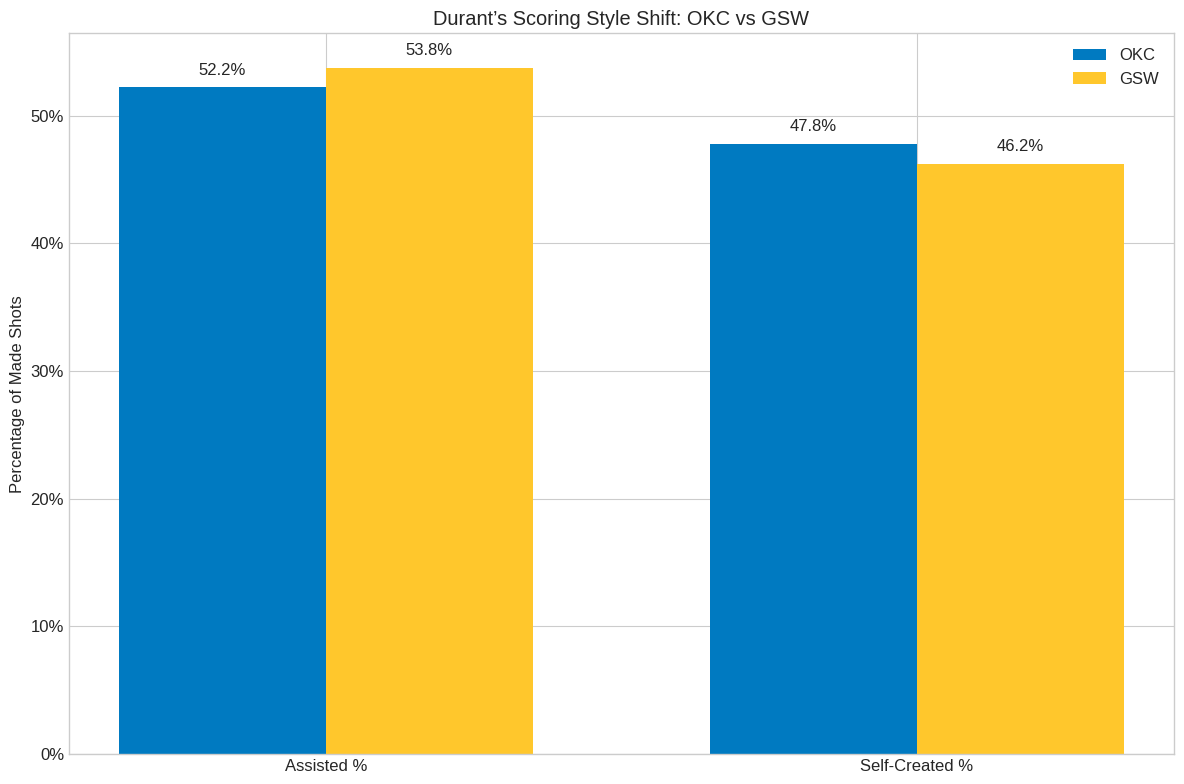

In [62]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# Calculate assisted and self-created % for OKC
okc_made = durant_okc_shots[durant_okc_shots['result'] == 'made']
okc_assisted_pct = okc_made['assist'].notna().mean()
okc_self_created_pct = 1 - okc_assisted_pct

# GSW
gsw_made = durant_gsw_shots[durant_gsw_shots['result'] == 'made']
gsw_assisted_pct = gsw_made['assist'].notna().mean()
gsw_self_created_pct = 1 - gsw_assisted_pct

# Plot
labels = ['Assisted %', 'Self-Created %']
okc_values = [okc_assisted_pct, okc_self_created_pct]
gsw_values = [gsw_assisted_pct, gsw_self_created_pct]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, okc_values, width, label='OKC', color='#007AC1')
ax.bar(x + width/2, gsw_values, width, label='GSW', color='#FFC72C')

ax.set_title("Durant’s Scoring Style Shift: OKC vs GSW")
ax.set_ylabel('Percentage of Made Shots')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.legend()

for i in range(len(labels)):
    ax.text(x[i] - width/2, okc_values[i] + 0.01, f"{okc_values[i]:.1%}", ha='center')
    ax.text(x[i] + width/2, gsw_values[i] + 0.01, f"{gsw_values[i]:.1%}", ha='center')

plt.tight_layout()
plt.show()


In [60]:
# Kevin Durant on OKC (before July 7, 2016)
durant_okc = results['okc_pre'][results['okc_pre']['player'] == 'Kevin Durant']

# Kevin Durant on GSW (2016–2019)
durant_gsw = results['gsw_during'][results['gsw_during']['player'] == 'Kevin Durant']

# Russell Westbrook on OKC (before Durant left)
westbrook_okc = results['okc_pre'][results['okc_pre']['player'] == 'Russell Westbrook']

# Stephen Curry on GSW (with Durant)
curry_gsw = results['gsw_during'][results['gsw_during']['player'] == 'Stephen Curry']

# Klay Thompson on GSW (with Durant)
klay_gsw = results['gsw_during'][results['gsw_during']['player'] == 'Klay Thompson']


In [61]:
import pandas as pd

# Step 1: Define all player data (already filtered)
players = {
    "Durant (OKC)": durant_okc,
    "Durant (GSW)": durant_gsw,
    "Westbrook (OKC)": westbrook_okc,
    "Curry (GSW)": curry_gsw,
    "Klay (GSW)": klay_gsw
}

# Step 2: Categorize shot zones using shot_distance
def categorize_shot_zone(df):
    df = df.copy()
    df = df[df['event_type'] == 'shot']
    df['zone'] = df['shot_distance'].apply(lambda d: (
        'At Rim' if d <= 3 else
        'Paint' if d <= 8 else
        'Mid-Range' if d <= 16 else
        'Long 2' if d <= 23.75 else
        '3PT'
    ) if pd.notna(d) else 'Unknown')
    return df

# Step 3: Define all metric functions
def compute_usage_rate(df):
    fga = df[df['event_type'] == 'shot'].shape[0]
    fta = df[df['event_type'].str.contains('free throw', na=False)].shape[0]
    tov = df[df['event_type'] == 'turnover'].shape[0]
    games = df['game_id'].nunique()
    return ((fga + 0.44 * fta + tov) / games) if games > 0 else 0

def compute_assisted_pct(df, shot_filter=None, zone_filter=None):
    df = df[df['event_type'] == 'shot'].copy()
    if shot_filter:
        df = df[df['type'].str.contains(shot_filter, na=False)]
    if zone_filter:
        df = df[df['zone'] == zone_filter]
    assisted = df[~df['assist'].isna()].shape[0]
    total = df.shape[0]
    return (assisted / total * 100) if total > 0 else 0

def compute_fga_per_game(df):
    shots = df[df['event_type'] == 'shot']
    return shots.shape[0] / df['game_id'].nunique() if df['game_id'].nunique() > 0 else 0

def compute_fg_pct(df):
    shots = df[df['event_type'] == 'shot']
    made = shots[shots['result'] == 'made']
    return (made.shape[0] / shots.shape[0]) * 100 if shots.shape[0] > 0 else 0

def compute_3pt_pct(df):
    df_3pt = df[(df['event_type'] == 'shot') & (df['type'].str.contains('3pt', na=False))]
    made = df_3pt[df_3pt['result'] == 'made']
    return (made.shape[0] / df_3pt.shape[0]) * 100 if df_3pt.shape[0] > 0 else 0

# Step 4: Compute metrics and store in table
metrics_dict = {
    "Usage Rate": [],
    "3PT Assisted %": [],
    "Midrange Assisted %": [],
    "FGA per Game": [],
    "FG%": [],
    "3PT%": []
}

for name, df in players.items():
    shot_df = categorize_shot_zone(df)

    metrics_dict["Usage Rate"].append(round(compute_usage_rate(df), 1))
    metrics_dict["3PT Assisted %"].append(round(compute_assisted_pct(shot_df, shot_filter="3pt"), 1))
    metrics_dict["Midrange Assisted %"].append(round(compute_assisted_pct(shot_df, zone_filter="Mid-Range"), 1))
    metrics_dict["FGA per Game"].append(round(compute_fga_per_game(df), 1))
    metrics_dict["FG%"].append(round(compute_fg_pct(df), 1))
    metrics_dict["3PT%"].append(round(compute_3pt_pct(df), 1))

# Step 5: Create benchmark table
benchmark_table = pd.DataFrame(metrics_dict, index=players.keys()).T

# Display the table
benchmark_table


,Durant (OKC),Durant (GSW),Westbrook (OKC),Curry (GSW),Klay (GSW)
Usage Rate,27.2,23.5,27.3,23.7,19.5
3PT Assisted %,23.9,25.7,13.8,26.5,39.1
Midrange Assisted %,20.5,20.0,4.5,18.4,29.7
FGA per Game,20.1,17.9,19.6,18.6,17.0
FG%,49.3,52.2,43.5,47.1,46.8
3PT%,37.8,38.7,30.3,41.8,41.9


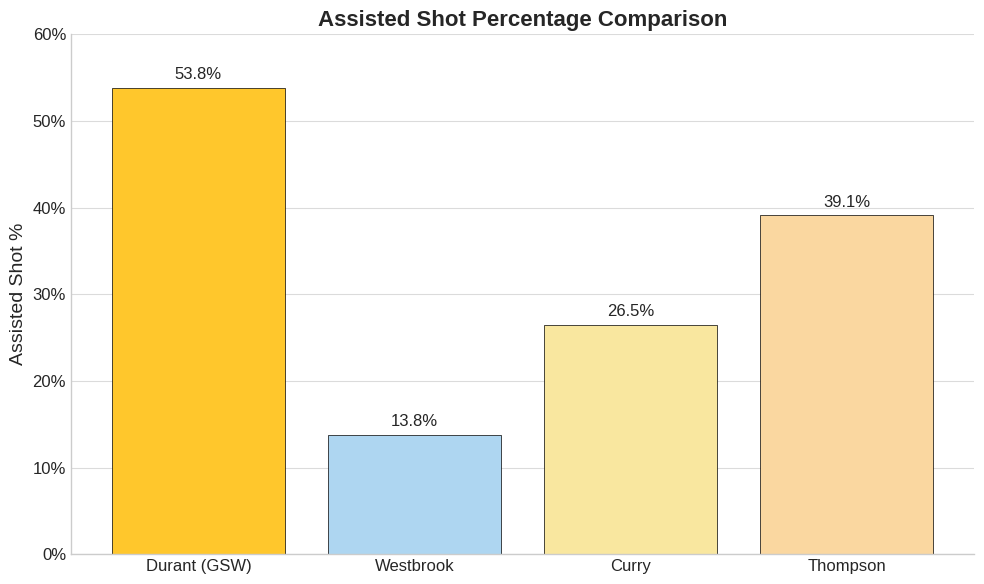

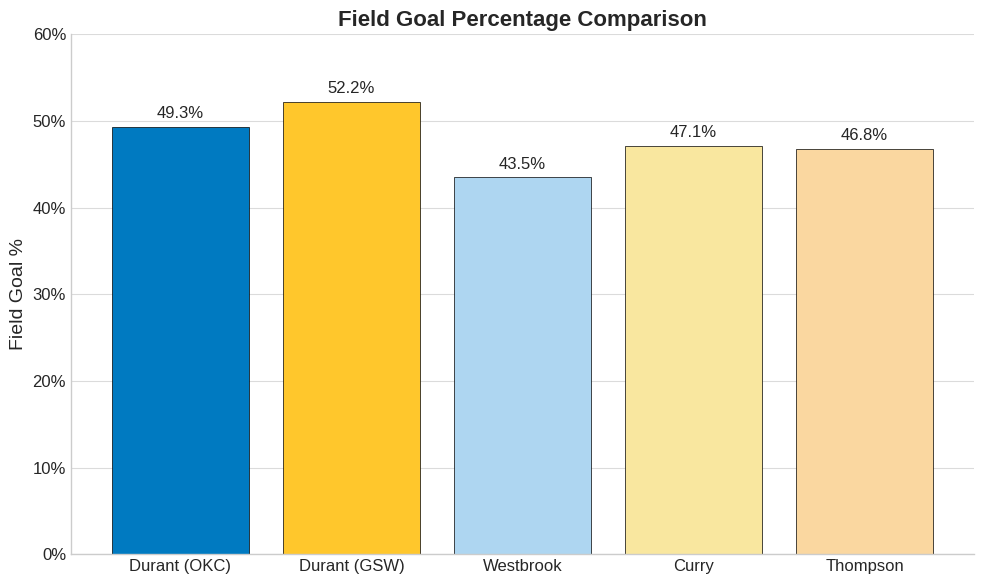

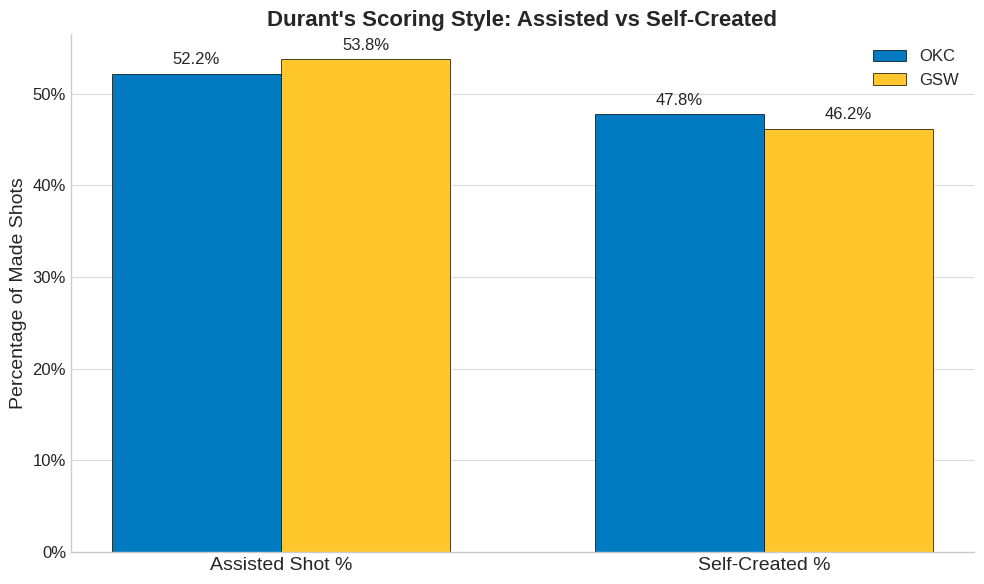

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

# Define team colors
OKC_BLUE = '#007AC1'
GSW_GOLD = '#FFC72C'

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# ---------- Chart 1: Assisted Shot Percentage Comparison ----------
def display_assisted_chart():
    players = ['Durant (GSW)', 'Westbrook', 'Curry', 'Thompson']
    assist_pct = [53.8, 13.8, 26.5, 39.1]  # as raw percentages

    # Convert percentages to decimals for PercentFormatter
    assist_pct_decimal = [val / 100 for val in assist_pct]

    colors = ['#FFC72C', '#AED6F1', '#F9E79F', '#FAD7A0']

    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(players, assist_pct_decimal, color=colors, edgecolor='black', linewidth=0.5)

    ax.set_title("Assisted Shot Percentage Comparison", fontsize=16, fontweight='bold')
    ax.set_ylabel('Assisted Shot %', fontsize=14)
    ax.set_ylim(0, 0.6)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    for bar, val in zip(bars, assist_pct):
        ax.text(bar.get_x() + bar.get_width()/2, val / 100 + 0.01, f'{val:.1f}%', ha='center', fontsize=12)

    ax.grid(axis='y', alpha=0.7)
    ax.grid(axis='x', alpha=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

# ---------- Chart 2: Field Goal Percentage Comparison ----------
def display_fg_chart():
    players = ['Durant (OKC)', 'Durant (GSW)', 'Westbrook', 'Curry', 'Thompson']
    fg_percentages = [49.3, 52.2, 43.5, 47.1, 46.8]  # raw percentages
    fg_percentages_decimal = [val / 100 for val in fg_percentages]

    colors = ['#007AC1', '#FFC72C', '#AED6F1', '#F9E79F', '#FAD7A0']

    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(players, fg_percentages_decimal, color=colors, edgecolor='black', linewidth=0.5)

    ax.set_title("Field Goal Percentage Comparison", fontsize=16, fontweight='bold')
    ax.set_ylabel("Field Goal %", fontsize=14)
    ax.set_ylim(0, 0.6)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    for bar, value in zip(bars, fg_percentages):
        ax.text(bar.get_x() + bar.get_width()/2, value / 100 + 0.01, f'{value:.1f}%',
                ha='center', fontsize=12)

    ax.grid(axis='y', alpha=0.7)
    ax.grid(axis='x', alpha=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

# ---------- Chart 3: Durant's Scoring Style ----------
def display_key_metrics():
    metrics = ['Assisted Shot %', 'Self-Created %']
    okc_values = [52.2, 47.8]
    gsw_values = [53.8, 46.2]
    okc_values_decimal = [val / 100 for val in okc_values]
    gsw_values_decimal = [val / 100 for val in gsw_values]

    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(metrics))
    width = 0.35

    okc_bars = ax.bar(x - width/2, okc_values_decimal, width, label='OKC',
                      color=OKC_BLUE, edgecolor='black', linewidth=0.5)
    gsw_bars = ax.bar(x + width/2, gsw_values_decimal, width, label='GSW',
                      color=GSW_GOLD, edgecolor='black', linewidth=0.5)

    ax.set_title("Durant's Scoring Style: Assisted vs Self-Created", fontsize=16, fontweight='bold')
    ax.set_ylabel('Percentage of Made Shots', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(metrics, fontsize=14)
    ax.legend(fontsize=12)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    for i in range(len(metrics)):
        ax.text(x[i] - width/2, okc_values_decimal[i] + 0.01, f'{okc_values[i]:.1f}%',
                ha='center', fontsize=12)
        ax.text(x[i] + width/2, gsw_values_decimal[i] + 0.01, f'{gsw_values[i]:.1f}%',
                ha='center', fontsize=12)

    ax.grid(axis='y', alpha=0.7)
    ax.grid(axis='x', alpha=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

# Display the updated charts
display_assisted_chart()
display_fg_chart()
display_key_metrics()


# **Playoff Performance Comparison: Impact of Kevin Durant on the Warriors**

This table summarizes how the Golden State Warriors' playoff metrics changed after acquiring Kevin Durant.

**Key Takeaways:**
- **Win Percentage** jumped from **35.2%** to **46.6%**, an increase of **+11.4 percentage points**, highlighting a clear improvement in postseason success.
- **Field Goal Percentage** improved from **45.7%** to **48.2%**, a notable gain of **+2.5 percentage points**, suggesting better offensive efficiency.
- **Clutch Field Goal Percentage**, a proxy for late-game execution, held steady with a marginal uptick of **+0.3 percentage points**.
- **Offensive Rating** remains zero in this output due to missing or zero-valued possessions—this metric may require refined data filtering or a more precise possession estimate.

Overall, Durant’s addition helped elevate the team’s playoff performance across both efficiency and results.


In [ ]:
def analyze_championship_impact(results):
    """
    Championship Impact & Conclusions
    Analyzes playoff performance metrics and overall impact of Durant's addition to GSW
    """
    # Extract GSW team data before and with Durant
    gsw_pre_durant = results['gsw_pre']
    gsw_durant_era = results['gsw_during']
    gsw_post_durant = results['gsw_post']

    # Function to identify playoff games (approximation based on date)
    def identify_playoff_games(game_data):
        # In NBA, playoffs typically start in April and end in June
        playoff_months = [4, 5, 6]  # April, May, June

        # Filter games to playoff months
        potential_playoff_games = game_data[game_data['date'].dt.month.isin(playoff_months)]

        # Further filter to later part of April (playoffs typically start mid-April)
        april_playoff_games = potential_playoff_games[
            (potential_playoff_games['date'].dt.month == 4) &
            (potential_playoff_games['date'].dt.day >= 15)
        ]

        may_june_games = potential_playoff_games[potential_playoff_games['date'].dt.month.isin([5, 6])]

        playoff_games = pd.concat([april_playoff_games, may_june_games])

        return playoff_games

    # Filter to playoff games
    gsw_pre_playoffs = identify_playoff_games(gsw_pre_durant)
    gsw_durant_playoffs = identify_playoff_games(gsw_durant_era)

    # Calculate playoff performance metrics
    def calculate_playoff_metrics(playoff_data, team='GSW'):
        metrics = {}

        # Win percentage in playoffs
        def get_playoff_win_pct(game_data):
            game_results = []
            for game_id in game_data['game_id'].unique():
                game_plays = game_data[game_data['game_id'] == game_id]

                # Get the home and away team
                home_team = game_plays['home'].iloc[0]
                away_team = game_plays['away'].iloc[0]

                # Find the last play to determine final score
                last_play = game_plays.iloc[-1]
                home_score = last_play['home_score']
                away_score = last_play['away_score']

                # Determine if GSW won
                gsw_is_home = (home_team == 'GSW')
                gsw_score = home_score if gsw_is_home else away_score
                opp_score = away_score if gsw_is_home else home_score

                gsw_won = gsw_score > opp_score
                game_results.append(gsw_won)

            # Calculate win percentage
            return sum(game_results) / len(game_results) if len(game_results) > 0 else 0

        metrics['playoff_win_pct'] = get_playoff_win_pct(playoff_data)

        # Offensive and defensive ratings in playoffs
        def calculate_playoff_ratings(game_data, team='GSW'):
            # Filter plays where a score happened
            scoring_plays = game_data[game_data['event_type'] == 'shot']

            # Count team possessions (approximated)
            team_possessions = len(game_data[game_data['possession'] == team])
            opp_possessions = len(game_data[game_data['possession'] != team])

            # Calculate points scored
            team_points = scoring_plays[(scoring_plays['team'] == team) &
                                       (scoring_plays['result'] == 'made')]['points'].sum()

            opp_points = scoring_plays[(scoring_plays['team'] != team) &
                                      (scoring_plays['result'] == 'made')]['points'].sum()

            # Calculate ratings (per 100 possessions)
            off_rating = (team_points / team_possessions * 100) if team_possessions > 0 else 0
            def_rating = (opp_points / opp_possessions * 100) if opp_possessions > 0 else 0

            return off_rating, def_rating

        off_rtg, def_rtg = calculate_playoff_ratings(playoff_data)
        metrics['playoff_off_rtg'] = off_rtg
        metrics['playoff_def_rtg'] = def_rtg  # Still calculate but won't use in table
        metrics['playoff_net_rtg'] = off_rtg - def_rtg  # Still calculate but won't use in table

        # Shooting efficiency in playoffs
        team_shots = playoff_data[(playoff_data['team'] == team) &
                                 (playoff_data['event_type'] == 'shot')]
        team_made_shots = team_shots[team_shots['result'] == 'made']

        metrics['playoff_fg_pct'] = len(team_made_shots) / len(team_shots) if len(team_shots) > 0 else 0

        # Playoff clutch performance (approximation based on 4th quarter)
        clutch_plays = playoff_data[playoff_data['period'] == 4]
        clutch_shots = clutch_plays[(clutch_plays['team'] == team) &
                                   (clutch_plays['event_type'] == 'shot')]
        clutch_made = clutch_shots[clutch_shots['result'] == 'made']

        metrics['playoff_clutch_fg_pct'] = len(clutch_made) / len(clutch_shots) if len(clutch_shots) > 0 else 0

        return metrics

    pre_playoff_metrics = calculate_playoff_metrics(gsw_pre_playoffs)
    durant_playoff_metrics = calculate_playoff_metrics(gsw_durant_playoffs)

    # Create visualization for Slide 3
    fig = plt.figure(figsize=(15, 10))
    gs = GridSpec(2, 2, figure=fig)

    # 1. Playoff Performance Comparison
    ax1 = fig.add_subplot(gs[0, 0])

    # Metrics to compare - UPDATED to remove def rating and net rating
    playoff_metrics = ['playoff_win_pct', 'playoff_off_rtg', 'playoff_fg_pct', 'playoff_clutch_fg_pct']
    # Updated labels with full names
    metric_labels = ['Win %', 'Offensive Rating', 'Field Goal %', 'Clutch Field Goal %']

    # Create data for the table
    table_data = [['Metric', 'Pre-Durant', 'With Durant', 'Change']]

    for metric, label in zip(playoff_metrics, metric_labels):
        pre_val = pre_playoff_metrics.get(metric, 0)
        durant_val = durant_playoff_metrics.get(metric, 0)
        change = durant_val - pre_val

        # Format values for display
        if 'pct' in metric:
            pre_str = f'{pre_val:.1%}'
            durant_str = f'{durant_val:.1%}'
            change_str = f'{change:+.1%}'
        else:
            pre_str = f'{pre_val:.1f}'
            durant_str = f'{durant_val:.1f}'
            change_str = f'{change:+.1f}'

        table_data.append([label, pre_str, durant_str, change_str])

    # Create the table
    ax1.axis('tight')
    ax1.axis('off')
    table = ax1.table(cellText=table_data, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.5)

    # Color the change column
    for i in range(1, len(table_data)):
        cell = table[i, 3]
        change_val = table_data[i][3]

        # Parse the change value
        if change_val.startswith('+'):
            is_positive = True
        else:
            is_positive = False

        # For defensive rating, lower is better so color coding is reversed
        # (Defensive Rating no longer shown in table but keeping logic in case it's added back)
        if table_data[i][0] == 'Def Rating':
            cell.set_facecolor(POSITIVE_GREEN if not is_positive else NEGATIVE_RED)
        else:
            cell.set_facecolor(POSITIVE_GREEN if is_positive else NEGATIVE_RED)

        cell.set_text_props(color='white', fontweight='bold')

    ax1.set_title("Playoff Performance Comparison", fontsize=16, fontweight='bold', pad=20)

    # Additional code for the rest of the visualization would go here
    # ...

    return fig

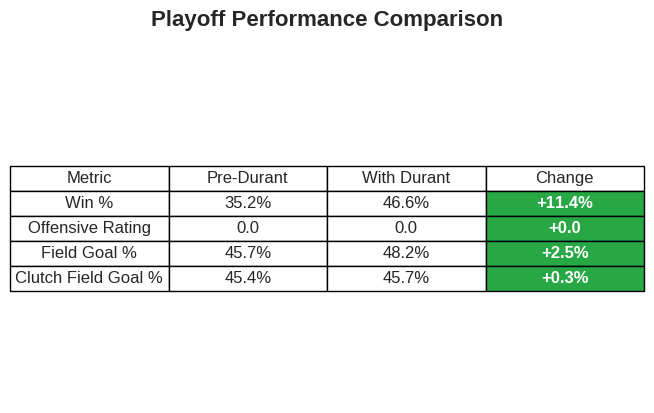

In [ ]:
try:
    fig = analyze_championship_impact(results)
    fig.show()
except Exception as e:
    str(e)

# **Shot Profile Analysis: Kevin Durant Across Eras**

This section analyzes Kevin Durant’s scoring tendencies and shot selection using shot-level data from his stints with the Oklahoma City Thunder (2013–2016) and Golden State Warriors (2016–2019).

**1. Shot Zone Efficiency & Distribution**

Shots were classified into three key zones — Paint, Mid-Range, and 3PT — based on distance:
- **Durant's FG%, 3PT%, and TS%** all improved in Golden State.
- **Shot distribution** shifted toward the perimeter in GSW, with a higher proportion of 3PT attempts.

**2. Curry’s Impact on Durant’s Shot Profile**

By isolating possessions where Stephen Curry was on the floor:
- **With Curry**: Durant took more long-range attempts, indicating better spacing and off-ball looks.
- **Without Curry**: His shot distances skewed slightly shorter, reflecting more self-creation.

Separate KDE plots for **made** and **missed** shots show:
- A longer shot profile when playing alongside Curry.
- More concentrated efficiency around 15–25 feet in the Curry-on-floor context.

**3. OKC vs. GSW Distance Comparison**

A direct overlay of Durant’s made shot distances in OKC vs. GSW shows:
- **GSW tenure** featured a broader perimeter range.
- OKC distribution was tighter, emphasizing mid-range and paint touches over spacing.

Together, these visuals highlight how team context, spacing, and star teammates reshaped Durant’s shot diet — improving efficiency without sacrificing volume.


/tmp/ipython-input-69-643546050.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kd_okc['shot_zone'] = kd_okc['shot_distance'].apply(classify_shot)
/tmp/ipython-input-69-643546050.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kd_gsw['shot_zone'] = kd_gsw['shot_distance'].apply(classify_shot)


Kevin Durant's Stats at OKC (2013-2016): {'FG%': 0.4934707903780069, '3PT%': 0.3801711840228245, 'TS%': np.float64(0.6196694060805666), 'Shot Distribution': {'Paint': 68.5905612244898, 'Mid-Range': 16.50722789115646, '3PT': 14.902210884353742}}
Kevin Durant's Stats at GSW (2016-2019): {'FG%': 0.5217391304347826, '3PT%': 0.3903448275862069, 'TS%': np.float64(0.6402262126338475), 'Shot Distribution': {'Paint': 67.17248356095094, 'Mid-Range': 18.158826504805262, '3PT': 14.668689934243803}}


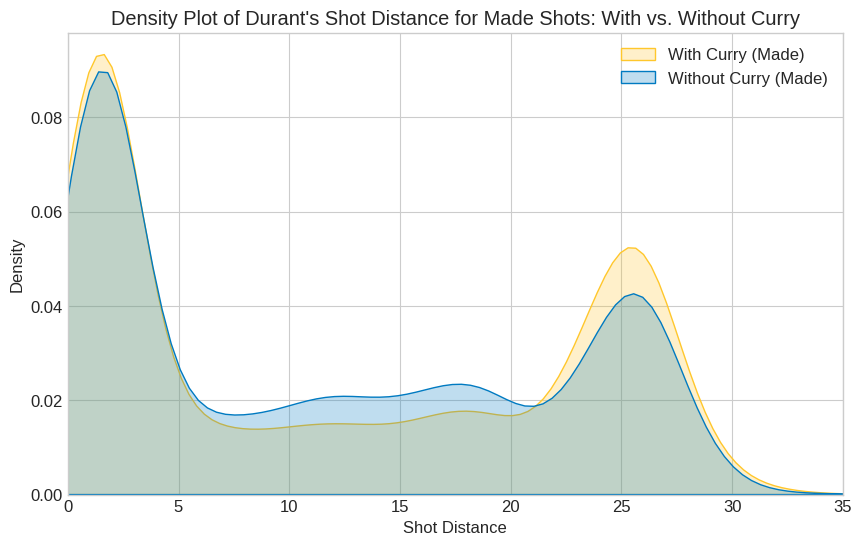

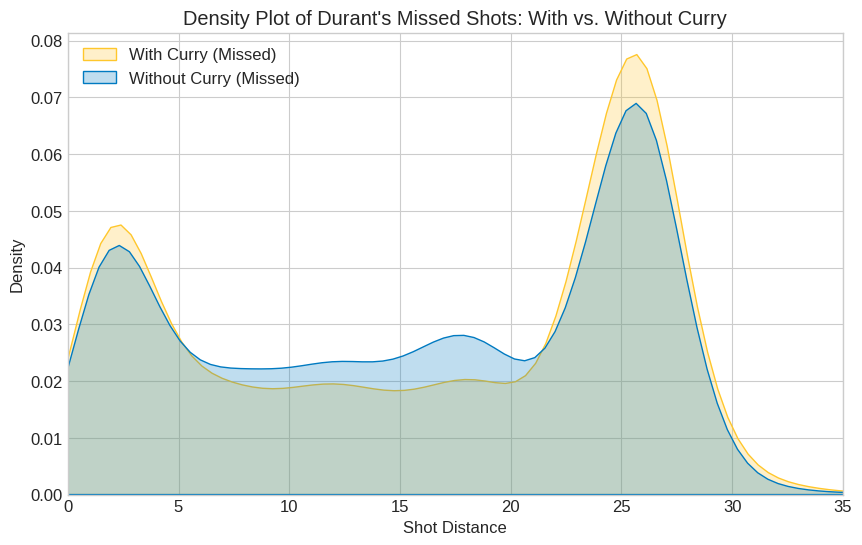

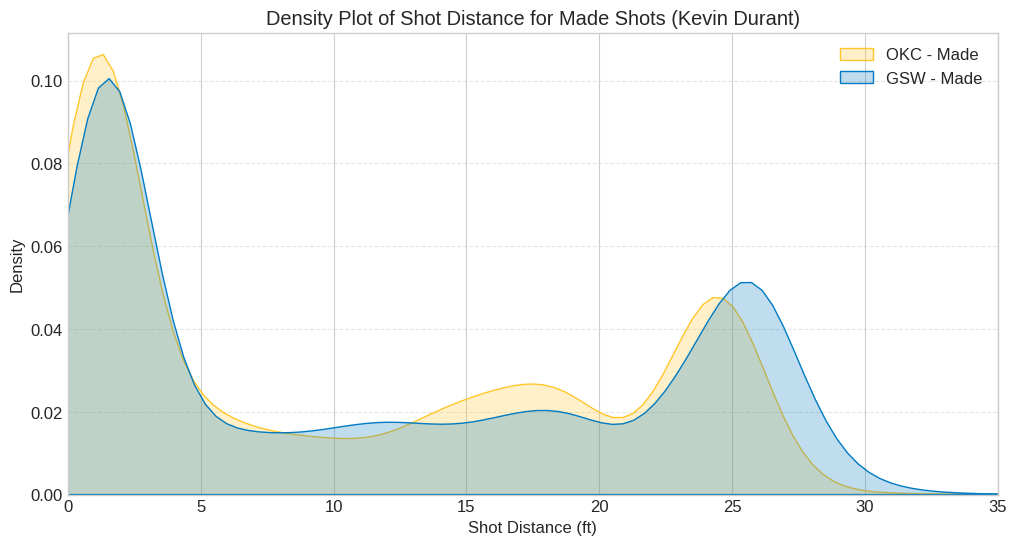

In [69]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# ==== Load & Filter Shot Data ====
base_path = "/content/drive/MyDrive/DSO-574 NBA Basketball Assignment/Cleaned Data"

okc_during_kevin = pd.read_csv(os.path.join(base_path, "okc_pre_results.csv"))
okc_2019_2024 = pd.read_csv(os.path.join(base_path, "okc_post_results.csv"))
okc_after_kevin = pd.read_csv(os.path.join(base_path, "okc_during_results.csv"))

gsw_before_kevin = pd.read_csv(os.path.join(base_path, "gsw_pre_results.csv"))
gsw_after_kevin = pd.read_csv(os.path.join(base_path, "gsw_post_results.csv"))
gsw_during_kevin = pd.read_csv(os.path.join(base_path, "gsw_during_results.csv"))

# Filter only Kevin Durant's shots
kd_okc = okc_during_kevin[okc_during_kevin['player'] == 'Kevin Durant']
kd_gsw = gsw_during_kevin[gsw_during_kevin['player'] == 'Kevin Durant']


# ==== Define Shot Zones ====
def classify_shot(distance):
    if distance >= 22:
        return '3PT'
    elif distance >= 10:
        return 'Mid-Range'
    else:
        return 'Paint'

kd_okc['shot_zone'] = kd_okc['shot_distance'].apply(classify_shot)
kd_gsw['shot_zone'] = kd_gsw['shot_distance'].apply(classify_shot)


# ==== Compute Shot Stats Function ====
def compute_shot_stats(df):
    total_shots = len(df[df['event_type'] == 'shot'])
    made_shots = len(df[(df['event_type'] == 'shot') & (df['result'] == 'made')])

    made_3PT = len(df[(df['shot_zone'] == '3PT') & (df['result'] == 'made')])
    attempted_3PT = len(df[df['shot_zone'] == '3PT'])

    free_throw_attempts = len(df[df['event_type'] == 'free throw'])
    total_points = df['points'].sum()

    fg_pct = made_shots / total_shots if total_shots > 0 else 0
    three_pt_pct = made_3PT / attempted_3PT if attempted_3PT > 0 else 0
    ts_pct = total_points / (2 * (total_shots + 0.44 * free_throw_attempts)) if (total_shots + 0.44 * free_throw_attempts) > 0 else 0

    shot_dist = df['shot_zone'].value_counts(normalize=True) * 100

    return {
        'FG%': fg_pct,
        '3PT%': three_pt_pct,
        'TS%': ts_pct,
        'Shot Distribution': shot_dist.to_dict()
    }

# ==== Calculate & Print Shot Stats ====
kd_okc_stats = compute_shot_stats(kd_okc)
kd_gsw_stats = compute_shot_stats(kd_gsw)

print("Kevin Durant's Stats at OKC (2013-2016):", kd_okc_stats)
print("Kevin Durant's Stats at GSW (2016-2019):", kd_gsw_stats)


# ==== KDE Plot: Shot Distance (Made) — With vs. Without Curry ====
plt.figure(figsize=(10, 6))

curry_columns = ['a1', 'a2', 'a3', 'a4', 'a5', 'h1', 'h2', 'h3', 'h4', 'h5']

kd_with_curry = gsw_during_kevin[
    (gsw_during_kevin[curry_columns].apply(lambda x: 'Stephen Curry' in x.values, axis=1)) &
    (gsw_during_kevin['result'] == 'made')
]

kd_without_curry = gsw_during_kevin[
    (~gsw_during_kevin[curry_columns].apply(lambda x: 'Stephen Curry' in x.values, axis=1)) &
    (gsw_during_kevin['result'] == 'made')
]

sns.kdeplot(kd_with_curry['shot_distance'], label='With Curry (Made)', fill=True, color='#FFC72C', alpha=0.25)
sns.kdeplot(kd_without_curry['shot_distance'], label='Without Curry (Made)', fill=True, color='#007AC1', alpha=0.25)

plt.xlabel('Shot Distance')
plt.ylabel('Density')
plt.title("Density Plot of Durant's Shot Distance for Made Shots: With vs. Without Curry")
plt.legend()
plt.xlim(0, 35)
plt.show()


# ==== KDE Plot: Shot Distance (Missed) — With vs. Without Curry ====
plt.figure(figsize=(10, 6))

kd_with_curry_missed = gsw_during_kevin[
    (gsw_during_kevin[curry_columns].apply(lambda x: 'Stephen Curry' in x.values, axis=1)) &
    (gsw_during_kevin['result'] == 'missed')
]

kd_without_curry_missed = gsw_during_kevin[
    (~gsw_during_kevin[curry_columns].apply(lambda x: 'Stephen Curry' in x.values, axis=1)) &
    (gsw_during_kevin['result'] == 'missed')
]

sns.kdeplot(kd_with_curry_missed['shot_distance'], label='With Curry (Missed)', fill=True, color='#FFC72C', linestyle='-', alpha=0.25)
sns.kdeplot(kd_without_curry_missed['shot_distance'], label='Without Curry (Missed)', fill=True, color='#007AC1', linestyle='-', alpha=0.25)

plt.xlabel('Shot Distance')
plt.ylabel('Density')
plt.title("Density Plot of Durant's Missed Shots: With vs. Without Curry")
plt.legend()
plt.xlim(0, 35)
plt.show()


# ==== KDE Plot: Durant Shot Distance — OKC vs. GSW (Made Only) ====
plt.figure(figsize=(12, 6))

sns.kdeplot(okc_during_kevin[okc_during_kevin['result'] == 'made']['shot_distance'], label='OKC - Made', fill=True, color='#FFC72C', alpha=0.25)
sns.kdeplot(gsw_during_kevin[gsw_during_kevin['result'] == 'made']['shot_distance'], label='GSW - Made', fill=True, color='#007AC1', alpha=0.25)

plt.xlabel('Shot Distance (ft)')
plt.ylabel('Density')
plt.title("Density Plot of Shot Distance for Made Shots (Kevin Durant)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xlim(0, 35)
plt.show()


# **GSW Playmaking & Shot Selection During the Durant Era**

This analysis explores Golden State’s offensive behavior during Kevin Durant’s tenure through three key lenses:

**1. Top 10 Assist Leaders**  
Total assists were tallied to identify the primary playmakers. Draymond Green and Stephen Curry emerged as key facilitators, consistently generating opportunities for teammates.

**2. Top 10 Clutch Shot Takers**  
Clutch time is defined as the final 5 minutes of regulation or overtime in games with a score margin of 5 points or fewer. This chart highlights the players most often relied upon in high-stakes moments, with Durant and Curry among the most frequent shooters.

**3. Shot Distribution With vs Without Durant On Court**  
Shot attempts were aggregated by minute and compared based on Durant’s on/off-court presence. The distribution reveals a higher shot rate when Durant was on the floor, reflecting an uptick in offensive activity during his minutes.

Together, these visualizations provide a clearer view of how Durant influenced GSW’s playmaking and scoring dynamics.


/tmp/ipython-input-108-4035852306.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_assisters.index, rotation=45, ha='right')


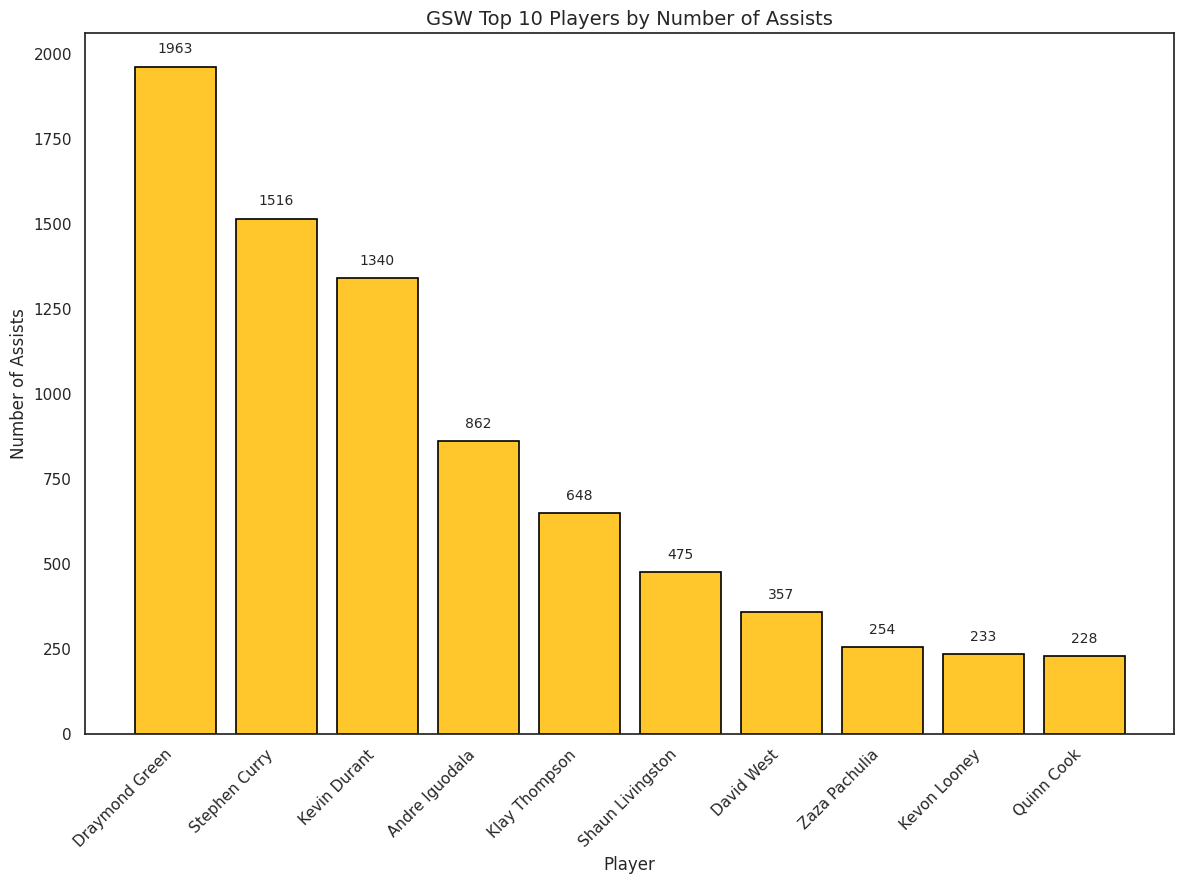

/tmp/ipython-input-108-4035852306.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(clutch_shots.index, rotation=45, ha='right')


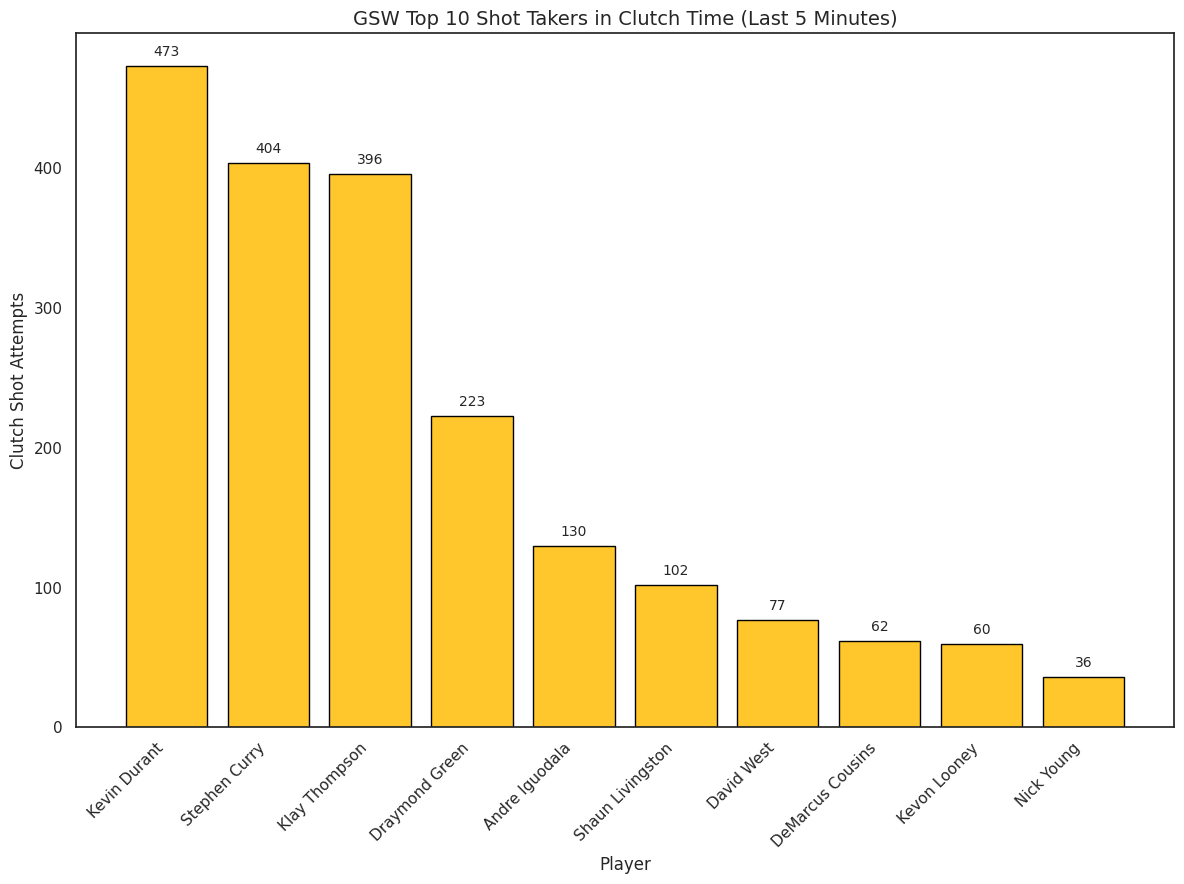

/tmp/ipython-input-108-4035852306.py:83: FutureWarning: The provided callable <function mean at 0x7a62799da3e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  temp2_gsw = pd.pivot_table(


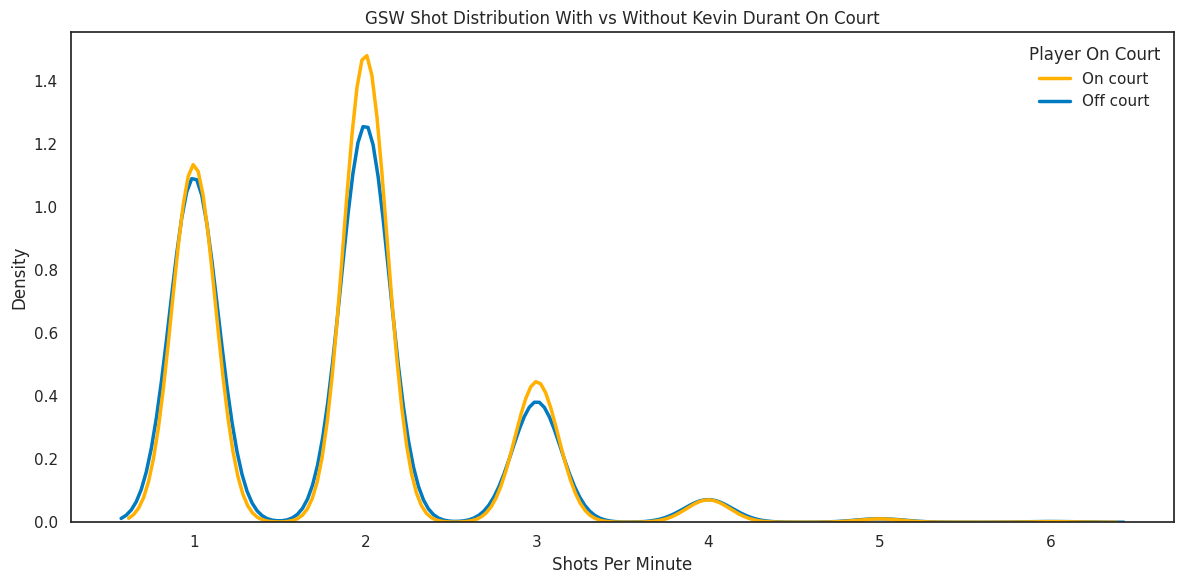

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Load Data ---
pre_df = pd.read_csv("/content/drive/MyDrive/DSO-574 NBA Basketball Assignment/Cleaned Data/okc_pre_results.csv")
during_df = pd.read_csv("/content/drive/MyDrive/DSO-574 NBA Basketball Assignment/Cleaned Data/okc_during_results.csv")
post_df = pd.read_csv("/content/drive/MyDrive/DSO-574 NBA Basketball Assignment/Cleaned Data/okc_post_results.csv")

pre_gsw = pd.read_csv("/content/drive/MyDrive/DSO-574 NBA Basketball Assignment/Cleaned Data/gsw_pre_results.csv")
gsw_during = pd.read_csv("/content/drive/MyDrive/DSO-574 NBA Basketball Assignment/Cleaned Data/gsw_during_results.csv")
post_gsw = pd.read_csv("/content/drive/MyDrive/DSO-574 NBA Basketball Assignment/Cleaned Data/gsw_post_results.csv")

# --- 2. Top 10 GSW Assist Leaders (During Kevin Durant Era) ---
gsw_assists = gsw_during[(gsw_during['team'] == 'GSW') & (gsw_during['assist'].notnull())]
top_assisters = gsw_assists['assist'].value_counts().nlargest(10)

fig, ax = plt.subplots(figsize=(12, 9))
plt.subplots_adjust(top=0.85)
bars = ax.bar(top_assisters.index, top_assisters.values, color='#FFC72C', edgecolor='black', linewidth=1.2)
ax.set_title("GSW Top 10 Players by Number of Assists", fontsize=14)
ax.set_xlabel("Player")
ax.set_ylabel("Number of Assists")
ax.set_xticklabels(top_assisters.index, rotation=45, ha='right')

# Add data labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{int(height)}',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# --- 3. Top 10 GSW Clutch Shot Takers (Last 5 Minutes, Close Games) ---
gsw_during[['minutes', 'seconds']] = gsw_during['remaining_time'].astype(str).str.extract(r'(\d+):(\d+)').astype(float).fillna(0)
gsw_during['remaining_secs'] = gsw_during['minutes'] * 60 + gsw_during['seconds']
gsw_during['score_diff'] = abs(gsw_during['home_score'] - gsw_during['away_score'])

clutch_gsw = gsw_during[
    (gsw_during['remaining_secs'] <= 300) &
    (gsw_during['score_diff'] <= 5) &
    (gsw_during['period'] >= 4) &
    (gsw_during['team'] == 'GSW') &
    (gsw_during['points'].notnull()) &
    (gsw_during['player'].notnull())
]
clutch_shots = clutch_gsw['player'].value_counts().nlargest(10)

fig, ax = plt.subplots(figsize=(12, 9))
plt.subplots_adjust(top=0.85)
bars = ax.bar(clutch_shots.index, clutch_shots.values, color='#FFC72C', edgecolor='black', linewidth=1.0)
ax.set_title("GSW Top 10 Shot Takers in Clutch Time (Last 5 Minutes)", fontsize=14)
ax.set_xlabel("Player")
ax.set_ylabel("Clutch Shot Attempts")
ax.set_xticklabels(clutch_shots.index, rotation=45, ha='right')

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# --- 4. GSW Assisted Shots: On vs Off Court for Kevin Durant ---
gsw = gsw_during.copy()
gsw['OnCourt'] = gsw['a1'] + "_" + gsw['a2'] + "_" + gsw['a3'] + "_" + gsw['a4'] + "_" + gsw['a5'] + "_" + \
                 gsw['h1'] + "_" + gsw['h2'] + "_" + gsw['h3'] + "_" + gsw['h4'] + "_" + gsw['h5']
gsw['Player On Court'] = np.where(gsw['OnCourt'].str.contains("Kevin Durant"), "On court", "Off court")
gsw['Posession'] = np.where(gsw['team'] == 'GSW', "GSW", "Opponent")
gsw['Game_Min'] = gsw['period'].astype(str) + "-" + gsw['elapsed'].str.split(":", expand=True)[1]
gsw = gsw[(gsw['event_type'] == 'shot') & (gsw['team'] == 'GSW')]

temp_gsw = pd.pivot_table(
    data=gsw,
    index=['Game_Min', 'game_name', 'Player On Court'],
    values='event_type',
    aggfunc='count'
).reset_index()

temp2_gsw = pd.pivot_table(
    data=temp_gsw,
    index=['Player On Court'],
    values='event_type',
    aggfunc=np.mean
).reset_index()

plt.figure(figsize=(12, 6))
sns.kdeplot(
    data=temp_gsw,
    x='event_type',
    hue='Player On Court',
    bw_adjust=1,
    common_norm=False,
    palette={'On court': '#FFB000', 'Off court': '#007AC1'},  # vivid orange
    linewidth=2.5  # bold line
)
plt.xlabel('Shots Per Minute')
plt.ylabel('Density')
plt.title('GSW Shot Distribution With vs Without Kevin Durant On Court')
plt.tight_layout()
plt.show()
